<a href="https://colab.research.google.com/github/distinctkemi/CE888/blob/main/Agrotech_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING LIBRARIES
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import scipy.stats as st


from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import Grouper
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.base import BaseEstimator, TransformerMixin
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold





#**Dataset description**

The dataset attached contains data from crops and daily weather data from a weather station.

The tab named ‘plants’ contains measurement data, each row being a plant that was cut and measured.

For each plant you have the following information:






• Batch number: the batch ID to which the plant belongs.

• Plant date: the date in which the batch that plant is part of was planted – You can ignore the rows for which no plant date is available.

• Flight date: the date in which the measurements were taken from the drone – You can fill the
missing values for this column using the information from the “2020 Flight dates” tab.

• Check date: the date at which the manual measurements (weight and size) were taken.

• Measurement information:

– Leaf Area (cm2): leaf area measured from above by the drone on the day it was flown (typically 30-40% of the way into the growth cycle).

– Leaves: the number of leaves in the plant.

– Fresh Weight (g): the wet biomass of the plant. – Always available

**– Head Weight (g): the wet biomass of the plant in saleable form (i.e. as you’d find it pack in a box for the supermarket) – Do not use this column as a feature to make your predictions.**

– Polar Diameter (mm): the diameter of the lettuce head from base to top.

– Radial Diameter (mm): the diameter of the lettuce head from side to side.

– **Diameter ratio: is computed from the polar and radial diameters. Do not use this column for your predictions.**

**– Density (kg/L): is computed from some of the measures above. Do not use this column for your predictions.**

– NOTE: The head of the lettuce only forms about 50% through the growth cycle. Thus, for early measurements there is no information about the radial and polar diameters—instead, there is information about the fresh weight and the number of leaves. For later measurements we have fresh weight, head weight and polar and radial diameters.

• Class: category that the plant belongs to. They range from 1–5, with 1 being the smaller plants and 5 being the largest ones.

There are also two tabs that detail when each batch of crop was flown (
“flight dates”) as well as the
planting records, which has the full details about each batch of crop (“planting”—you can use or ignore
this sheet for your model).
The tab “weather” contains daily weather data from a local weather station.


#**Plant Data Sheet**
This consist of 4859 rows and 15 columns

In [ ]:
# Loading the data per sheet
#1.
plant_df = pd.read_excel(r'Data.xlsx', parse_dates=True, sheet_name='plants')
plant_df.head()


Batch Number Plant Date  Class  Fresh Weight (g)  Head Weight (g)  \
0           402 2020-04-11      3              15.0              NaN   
1           402 2020-04-11      4              15.0              NaN   
2           402 2020-04-11      1              16.0              NaN   
3           402 2020-04-11      3              15.0              NaN   
4           402 2020-04-11      3              15.0              NaN   

   Radial Diameter (mm)  Polar Diameter (mm)  Diameter Ratio  Leaves  \
0                   NaN                  NaN             NaN    10.0   
1                   NaN                  NaN             NaN    11.0   
2                   NaN                  NaN             NaN    12.0   
3                   NaN                  NaN             NaN    10.0   
4                   NaN                  NaN             NaN    11.0   

   Density (kg/L)  Leaf Area (cm^2)  Square ID Check Date Flight Date Remove  
0             NaN             185.0        208 2020-04-30         NaT    NaN  
1             NaN             156.0        208 2020-04-30         NaT    NaN  
2             NaN             137.0        208 2020-04-30         NaT    NaN  
3             NaN             225.0        208 2020-04-30         NaT    NaN  
4             NaN             157.0        208 2020-04-30         NaT    NaN

In [ ]:
plant_df.shape

(4859, 15)

In [ ]:
plant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4859 non-null   int64         
 1   Plant Date            4685 non-null   datetime64[ns]
 2   Class                 4859 non-null   int64         
 3   Fresh Weight (g)      4858 non-null   float64       
 4   Head Weight (g)       4754 non-null   float64       
 5   Radial Diameter (mm)  4754 non-null   float64       
 6   Polar Diameter (mm)   4754 non-null   float64       
 7   Diameter Ratio        4752 non-null   float64       
 8   Leaves                100 non-null    float64       
 9   Density (kg/L)        4672 non-null   float64       
 10  Leaf Area (cm^2)      4857 non-null   float64       
 11  Square ID             4859 non-null   int64         
 12  Check Date            4859 non-null   datetime64[ns]
 13  Flight Date       

In [ ]:
plant_df.isnull().sum()

Batch Number               0
Plant Date               174
Class                      0
Fresh Weight (g)           1
Head Weight (g)          105
Radial Diameter (mm)     105
Polar Diameter (mm)      105
Diameter Ratio           107
Leaves                  4759
Density (kg/L)           187
Leaf Area (cm^2)           2
Square ID                  0
Check Date                 0
Flight Date             4387
Remove                  4789
dtype: int64

Over 98% of the leaves and remove column is nan, dropping these two columns together with Diameter Ratio, and square Id 

In [ ]:
#Task 1
#Renaming Columns in Plants Sheet
col_names ={'Batch Number': 'Batch_Number','Plant Date':'Plant_Date', 'Fresh Weight (g)': 'Fresh_Weight', 'Head Weight (g)': 'Head_Weight','Radial Diameter (mm)': 'Radial_Diameter','Polar Diameter (mm)': 'Polar_Diameter','Diameter Ratio': 'Diameter_Ratio', 'Density (kg/L)':'Density', 'Leaf Area (cm^2)':'Leaf_Area','Check Date':'Check_Date','Flight Date':'Flight_Date'}
plant_df.rename(columns = col_names, inplace = True )
plant_df.drop(['Remove', 'Density', 'Diameter_Ratio', 'Square ID', 'Leaves'], axis=1, inplace=True) #Dropping empty columns
plant_df.head()

Batch_Number Plant_Date  Class  Fresh_Weight  Head_Weight  Radial_Diameter  \
0           402 2020-04-11      3          15.0          NaN              NaN   
1           402 2020-04-11      4          15.0          NaN              NaN   
2           402 2020-04-11      1          16.0          NaN              NaN   
3           402 2020-04-11      3          15.0          NaN              NaN   
4           402 2020-04-11      3          15.0          NaN              NaN   

   Polar_Diameter  Leaf_Area Check_Date Flight_Date  
0             NaN      185.0 2020-04-30         NaT  
1             NaN      156.0 2020-04-30         NaT  
2             NaN      137.0 2020-04-30         NaT  
3             NaN      225.0 2020-04-30         NaT  
4             NaN      157.0 2020-04-30         NaT

**General Visualization of tha plant data**

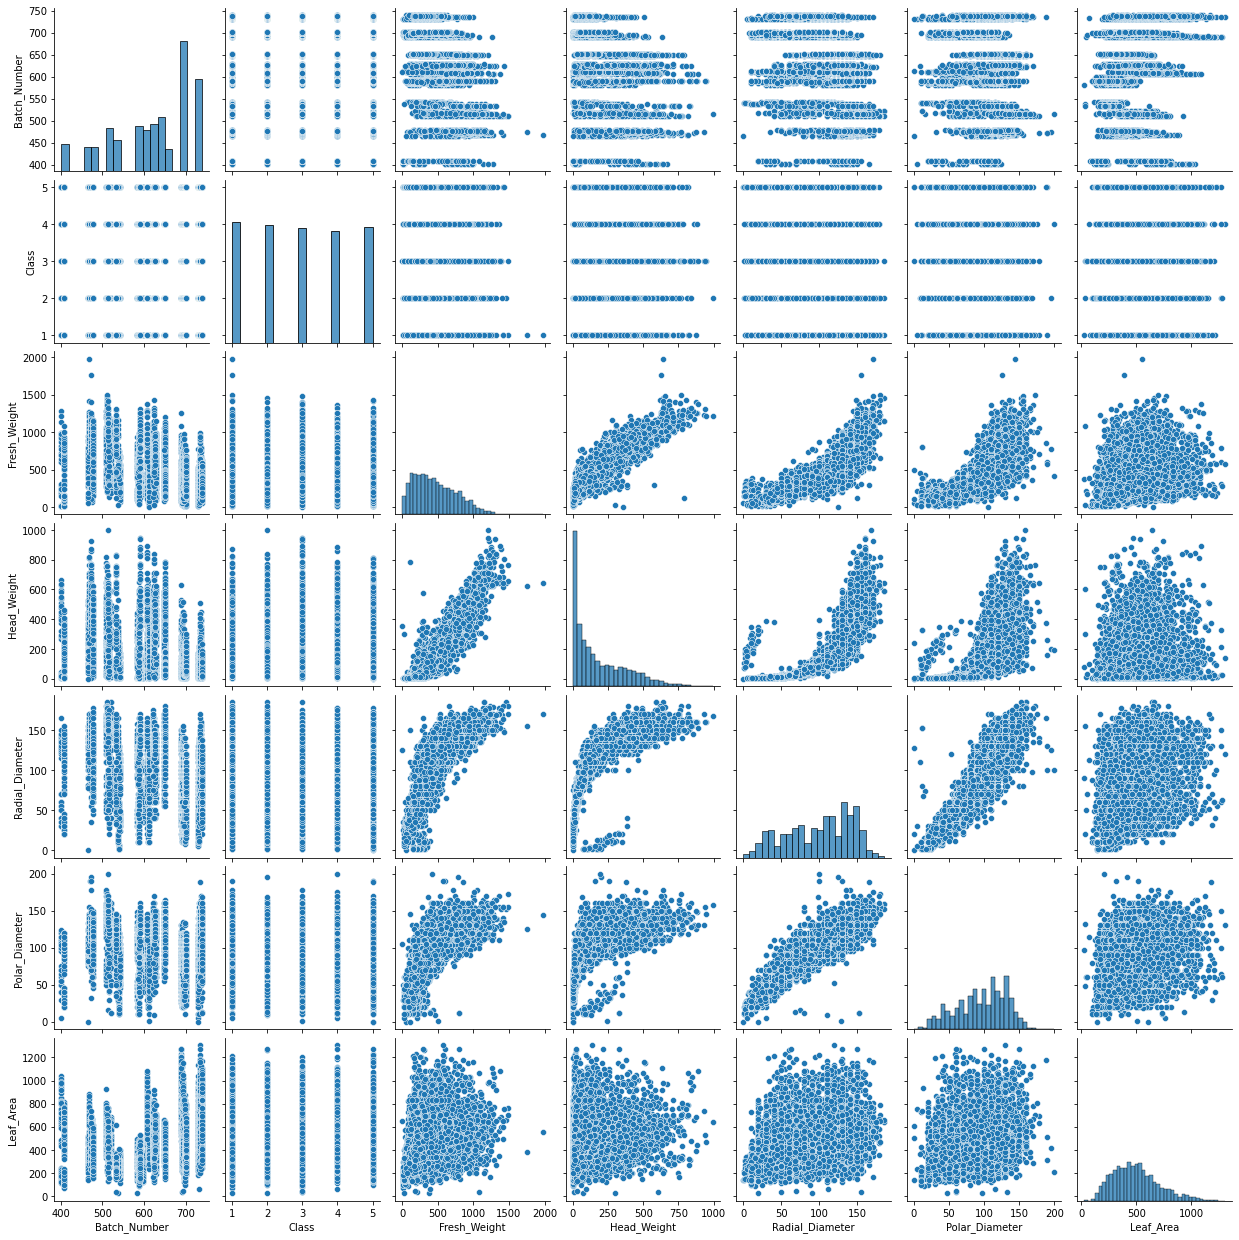

In [ ]:
sns.pairplot(plant_df)

**Statistics summary of plant data sheet and outlier check on some columns**

In [ ]:
plant_df.describe()

Batch_Number        Class  Fresh_Weight  Head_Weight  Radial_Diameter  \
count   4859.000000  4859.000000   4858.000000  4754.000000      4754.000000   
mean     621.778349     2.973040    469.627755   183.349811        99.316996   
std       92.932427     1.422882    295.819075   187.242036        42.708981   
min      402.000000     1.000000      0.632000     0.000000         0.000000   
25%      542.000000     2.000000    229.250000    28.000000        65.000000   
50%      647.000000     3.000000    426.000000   115.000000       109.000000   
75%      698.000000     4.000000    677.000000   304.000000       135.000000   
max      739.000000     5.000000   1978.000000   998.000000       185.000000   

       Polar_Diameter    Leaf_Area  
count     4754.000000  4857.000000  
mean        96.546277   495.275067  
std         34.909629   212.659323  
min          0.000000    25.000000  
25%         70.000000   337.000000  
50%        100.000000   471.000000  
75%        125.000000   620.000000  
max        200.000000  1305.000000

**Checking for ouliers and skewness of some columns that have large margin between minimum and maximum value with high standard deviation** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


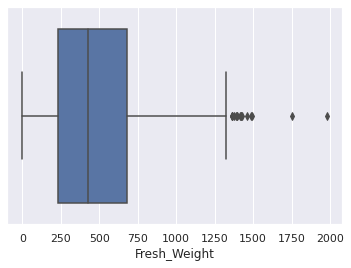

In [ ]:
sns.boxplot(plant_df['Fresh_Weight'])
plt.savefig('Fresh Weight.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


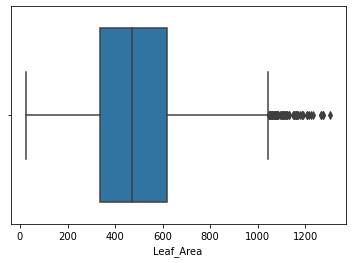

In [ ]:
myFig = plt.figure();
sns.boxplot(plant_df['Leaf_Area'])
myFig.savefig("Leave_Area.png", format="png")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


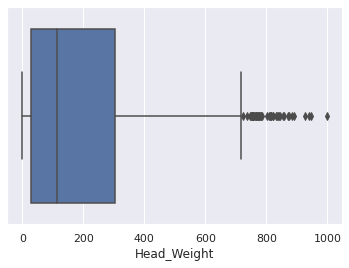

In [ ]:
sns.boxplot(plant_df['Head_Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


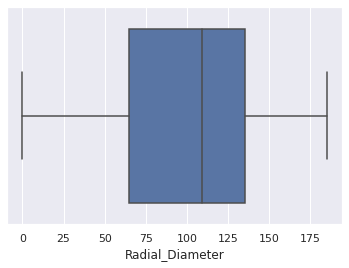

In [ ]:
sns.boxplot(plant_df['Radial_Diameter'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


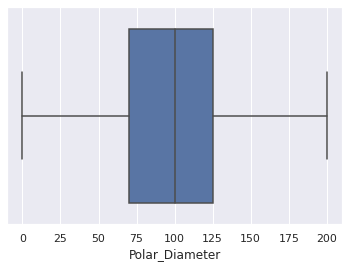

In [ ]:
sns.boxplot(plant_df['Polar_Diameter'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


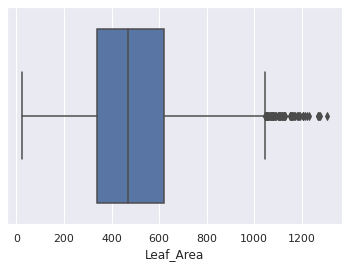

In [ ]:
sns.boxplot(plant_df['Leaf_Area'])

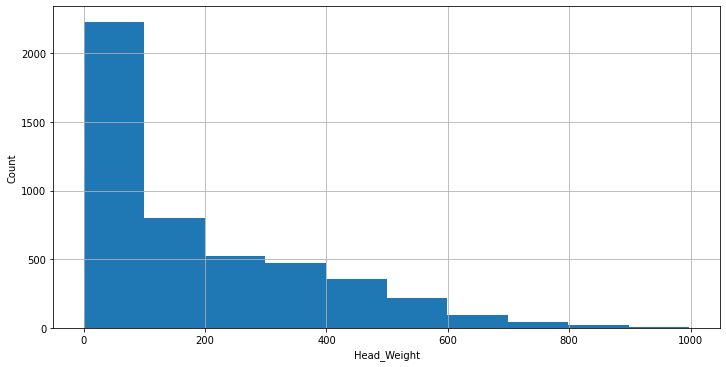

In [ ]:
#plant_df['Leaf_Area'].histogram
plant_df['Head_Weight'].hist(figsize=(10,5))
plt.tight_layout()
plt.xlabel('Head_Weight')
plt.ylabel ('Count')
plt.savefig('HW_Hist.png')
plt.show()

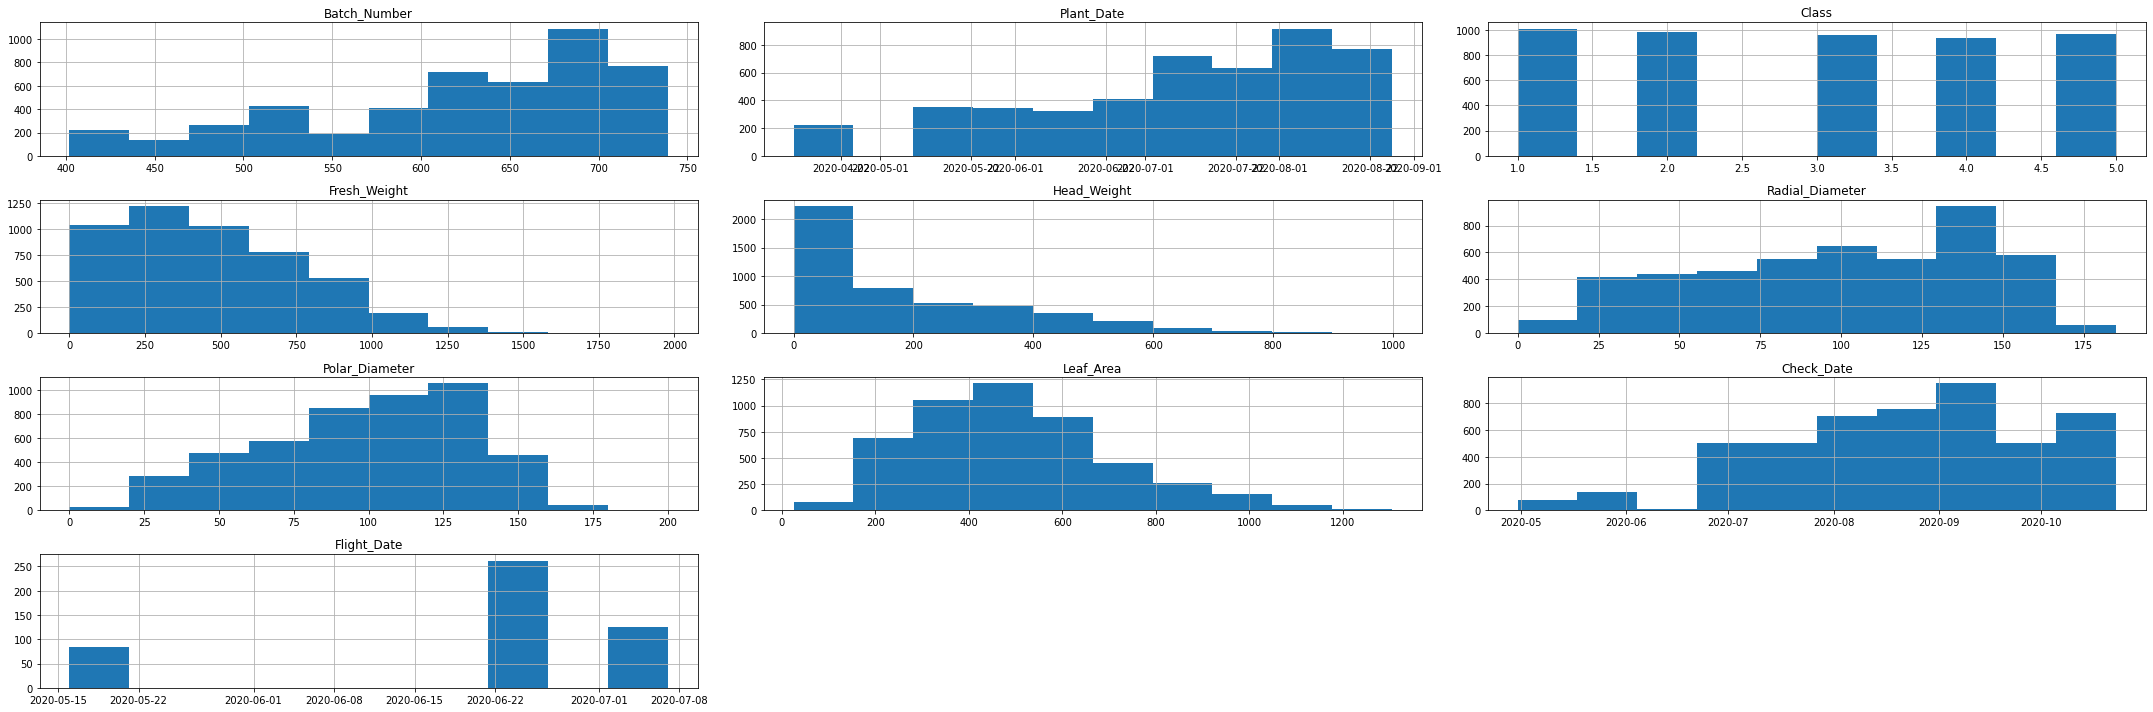

In [ ]:
#plot Histogram for Plants Dataset
plant_df.hist(figsize=(30,10))
plt.tight_layout()
plt.show()

<Figure size 640x640 with 0 Axes>

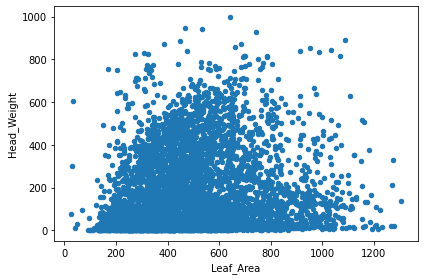

In [ ]:
#plot scatterplot for plants dataset focusing plant_date and flight_date
plt.figure(figsize=(8, 8), dpi=80)
plant_df.plot.scatter('Leaf_Area','Head_Weight')
plt.tight_layout()
plt.show()

<Figure size 640x640 with 0 Axes>

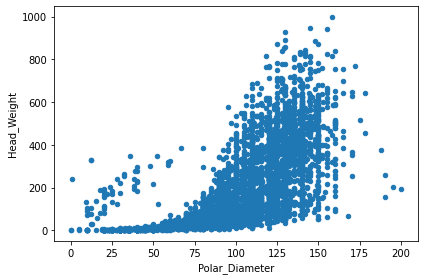

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
plant_df.plot.scatter('Polar_Diameter','Head_Weight')
plt.tight_layout()

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 640x640 with 0 Axes>

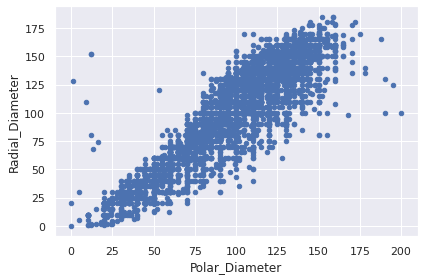

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
plant_df.plot.scatter('Polar_Diameter','Radial_Diameter')
plt.tight_layout()
plt.savefig('Rp.png')
plt.show()


<Figure size 640x640 with 0 Axes>

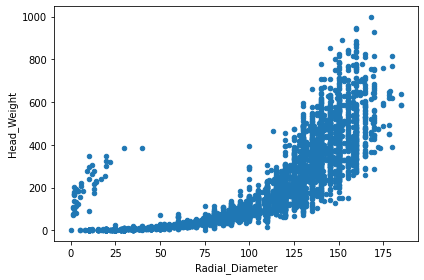

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
plant_df.plot.scatter('Radial_Diameter','Head_Weight')
plt.tight_layout()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 640x640 with 0 Axes>

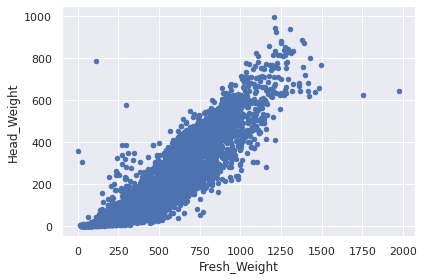

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
plant_df.plot.scatter('Fresh_Weight','Head_Weight')
plt.tight_layout()
plt.savefig('HF.png')
plt.show()

In [ ]:
#Checking for total number of missing values in each column
plant_df.isnull().sum()

Batch_Number          0
Plant_Date          174
Class                 0
Fresh_Weight          1
Head_Weight         105
Radial_Diameter     105
Polar_Diameter      105
Leaf_Area             2
Check_Date            0
Flight_Date        1459
dtype: int64

#**Flight Date Sheet**

In [ ]:
#rename columns in flight_dates data set
flight_dates = pd.read_excel(r'Data.xlsx', parse_dates=True, sheet_name='flight dates')#e   
flight_dates.head()                      

Batch Number Flight Date
0           402  2020-04-30
1           408  2020-04-30
2           409  2020-04-30
3           466  2020-07-01
4           467  2020-07-01

In [ ]:
#Renaming the columns to match the plant data sheet for easy merging
col_na ={'Flight Date':'Flight_Date', 'Batch Number': 'Batch_Number'}
flight_dates.rename(columns = col_na, inplace = True )

In [ ]:
#Checking for the details of the sheet 
flight_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Batch_Number  50 non-null     int64         
 1   Flight_Date   50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 928.0 bytes


In [ ]:
flight_dates.shape

(50, 2)

**Merging Plant and Flight Date Sheet** 



In [ ]:
#Updating the missing flight date in the plant sheet with the flight date from the flight data sheet
plant_df = plant_df.set_index(['Batch_Number'])
plant_df.update(flight_dates.set_index(['Batch_Number']))
plant_df = plant_df.reset_index()


##**Handling Missing Values**

In [ ]:
plant_df.isnull().sum()

Batch_Number          0
Plant_Date          174
Class                 0
Fresh_Weight          1
Head_Weight         105
Radial_Diameter     105
Polar_Diameter      105
Leaf_Area             2
Check_Date            0
Flight_Date        1459
dtype: int64

In [ ]:
#Dropping the missing values in the flight date because there are no data for it on both plant sheet and flight date sheet and filling the missing values of 
#Using median for fresh weight and head because of the skewness of the data in those columns
plant_df.dropna(subset = ["Flight_Date"], inplace=True)
plant_df['Radial_Diameter'] = plant_df['Radial_Diameter'].fillna(plant_df['Radial_Diameter'].mean())
plant_df['Polar_Diameter'] = plant_df['Polar_Diameter'].fillna(plant_df['Polar_Diameter'].mean())
plant_df['Leaf_Area'] = plant_df['Leaf_Area'].fillna(plant_df['Leaf_Area'].median())
plant_df['Fresh_Weight'] = plant_df['Fresh_Weight'].fillna(plant_df['Fresh_Weight'].median())
plant_df['Head_Weight'] = plant_df['Head_Weight'].fillna(plant_df['Head_Weight']. median())
plant_df

Batch_Number Plant_Date  Class  Fresh_Weight  Head_Weight  \
0              402 2020-04-11      3          15.0        192.5   
1              402 2020-04-11      4          15.0        192.5   
2              402 2020-04-11      1          16.0        192.5   
3              402 2020-04-11      3          15.0        192.5   
4              402 2020-04-11      3          15.0        192.5   
...            ...        ...    ...           ...          ...   
3840           693        NaT      4         621.0        188.0   
3841           693        NaT      1         680.0        273.0   
3842           693        NaT      2         583.0        203.0   
3843           693        NaT      3         609.0        213.0   
3844           693        NaT      3         709.0        283.0   

      Radial_Diameter  Polar_Diameter  Leaf_Area Check_Date Flight_Date  
0          108.791036      101.164749      185.0 2020-04-30  2020-04-30  
1          108.791036      101.164749      156.0 2020-04-30  2020-04-30  
2          108.791036      101.164749      137.0 2020-04-30  2020-04-30  
3          108.791036      101.164749      225.0 2020-04-30  2020-04-30  
4          108.791036      101.164749      157.0 2020-04-30  2020-04-30  
...               ...             ...        ...        ...         ...  
3840       120.000000       85.000000      780.0 2020-09-25  2020-09-10  
3841       120.000000       90.000000      834.0 2020-09-25  2020-09-10  
3842       115.000000       92.000000      726.0 2020-09-25  2020-09-10  
3843       120.000000       90.000000      769.0 2020-09-25  2020-09-10  
3844       130.000000       93.000000      802.0 2020-09-25  2020-09-10  

[3400 rows x 10 columns]

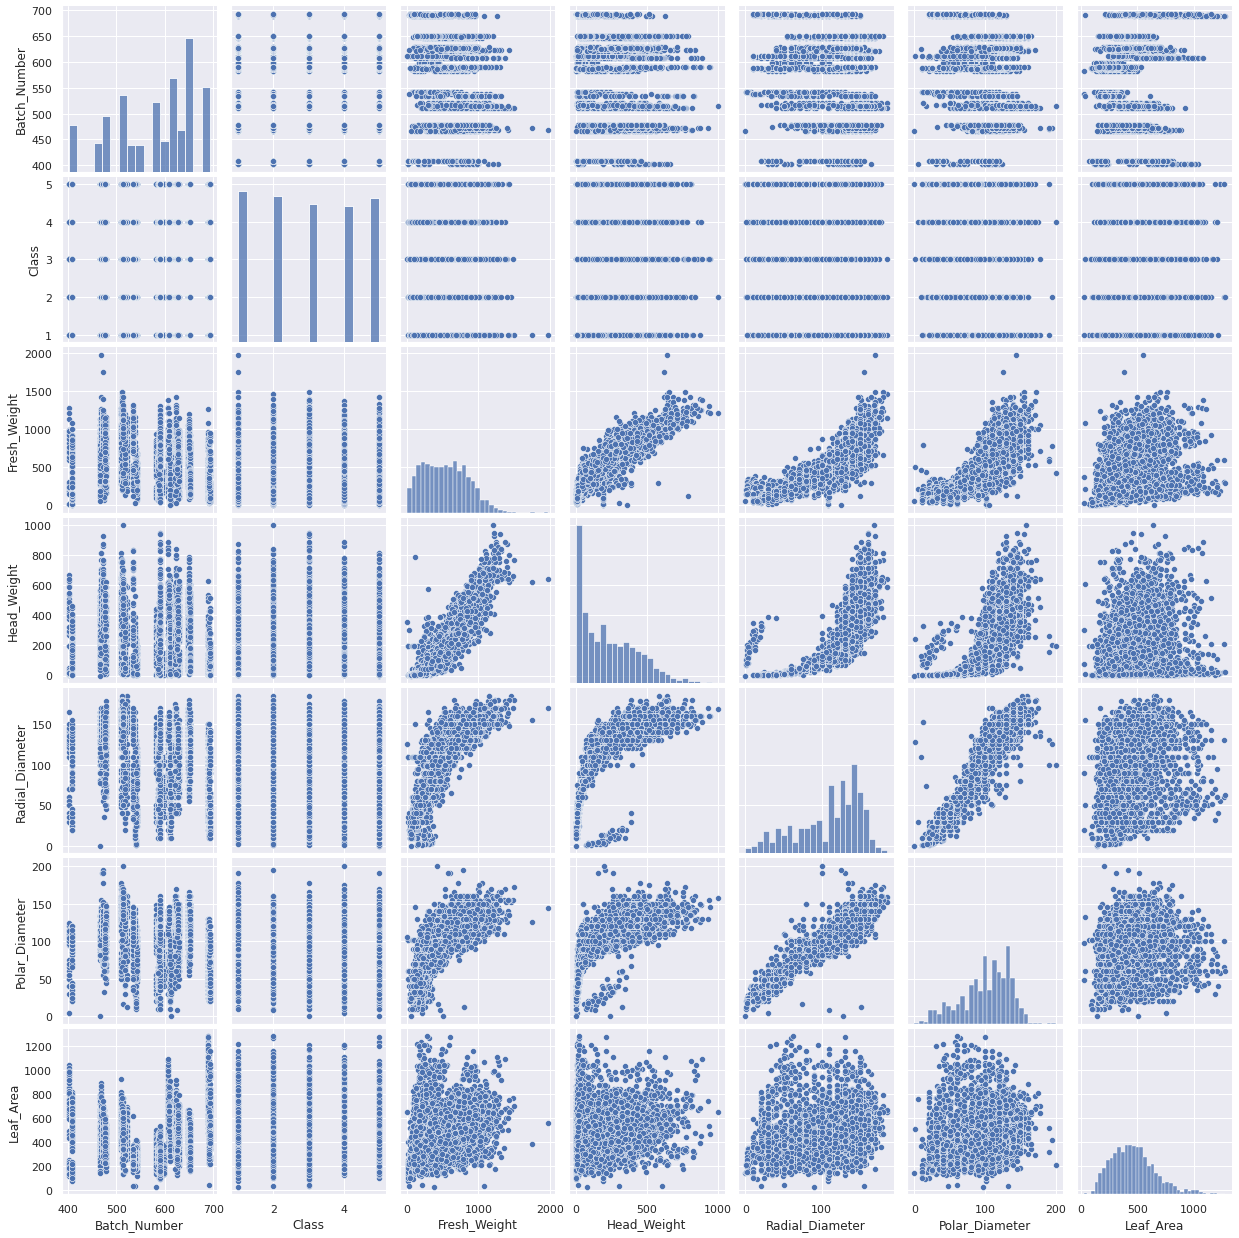

In [ ]:
_ = sns.pairplot(plant_df)

In [ ]:
#Confirming all missing values have been handled ecept the plant date which would be handled in the planting data sheet section
plant_df.isnull().sum()

Batch_Number        0
Plant_Date         40
Class               0
Fresh_Weight        0
Head_Weight         0
Radial_Diameter     0
Polar_Diameter      0
Leaf_Area           0
Check_Date          0
Flight_Date         0
dtype: int64

In [ ]:
plant_df['Class'].nunique()

5

In [ ]:
plant_df['Class'].value_counts()

1    719
2    693
5    685
3    658
4    645
Name: Class, dtype: int64

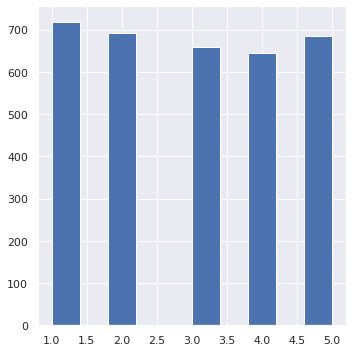

In [ ]:

plant_df['Class'].hist(figsize=(5,5))
plt.tight_layout()
plt.show()

In [85]:
#Task 2 
#Merging flight date and Plant date
#merge_1 = pd.merge(plant_df, flight_dates, on= 'Batch_Number', how = 'left')
#merge_1.head()

#**Planting Data Sheet**

In [86]:
#Importing Planting Data Sheet
planting_df = pd.read_excel(r'Data.xlsx', parse_dates=True, sheet_name='planting')

#Dropping rows  from 1822 because it is not supposed to be part of the data
planting_df.drop(planting_df.index[1822:2373], inplace =True) 

#Renaming the columns to match the plant data sheet for easy merging 
col_nam ={'Planting_Batch':'Batch_Number'}
planting_df.rename(columns = col_nam, inplace = True )

#Dropping empty columns
planting_df.drop(['Column2', 'Column3', 'Column1', 'Column4', 'Region'], axis = 1, inplace = True)
planting_df.head()

Crop           Plant_Date Batch_Number  Volume_Planted  Planting_Wk
0    3  2020-02-06 00:00:00          392        198912.0          6.0
1    3  2020-02-07 00:00:00          503         63840.0          6.0
2    3  2020-02-07 00:00:00          614        179928.0          6.0
3    3  2020-02-08 00:00:00          725        200256.0          6.0
4    3  2020-02-10 00:00:00          770         13944.0          7.0

Merging Plant and planting data 

In [ ]:
merge_df = pd.merge(plant_df, planting_df, on= 'Batch_Number', how = 'left')
merge_df

Batch_Number Plant_Date_x  Class  Fresh_Weight  Head_Weight  \
0             402   2020-04-11      3          15.0        192.5   
1             402   2020-04-11      4          15.0        192.5   
2             402   2020-04-11      1          16.0        192.5   
3             402   2020-04-11      3          15.0        192.5   
4             402   2020-04-11      3          15.0        192.5   
...           ...          ...    ...           ...          ...   
3395          693          NaT      4         621.0        188.0   
3396          693          NaT      1         680.0        273.0   
3397          693          NaT      2         583.0        203.0   
3398          693          NaT      3         609.0        213.0   
3399          693          NaT      3         709.0        283.0   

      Radial_Diameter  Polar_Diameter  Leaf_Area Check_Date Flight_Date Crop  \
0          108.791036      101.164749      185.0 2020-04-30  2020-04-30    3   
1          108.791036      101.164749      156.0 2020-04-30  2020-04-30    3   
2          108.791036      101.164749      137.0 2020-04-30  2020-04-30    3   
3          108.791036      101.164749      225.0 2020-04-30  2020-04-30    3   
4          108.791036      101.164749      157.0 2020-04-30  2020-04-30    3   
...               ...             ...        ...        ...         ...  ...   
3395       120.000000       85.000000      780.0 2020-09-25  2020-09-10    3   
3396       120.000000       90.000000      834.0 2020-09-25  2020-09-10    3   
3397       115.000000       92.000000      726.0 2020-09-25  2020-09-10    3   
3398       120.000000       90.000000      769.0 2020-09-25  2020-09-10    3   
3399       130.000000       93.000000      802.0 2020-09-25  2020-09-10    3   

             Plant_Date_y  Volume_Planted  Planting_Wk  
0     2020-04-11 00:00:00        155232.0         15.0  
1     2020-04-11 00:00:00        155232.0         15.0  
2     2020-04-11 00:00:00        155232.0         15.0  
3     2020-04-11 00:00:00        155232.0         15.0  
4     2020-04-11 00:00:00        155232.0         15.0  
...                   ...             ...          ...  
3395  2020-08-08 00:00:00        133056.0         32.0  
3396  2020-08-08 00:00:00        133056.0         32.0  
3397  2020-08-08 00:00:00        133056.0         32.0  
3398  2020-08-08 00:00:00        133056.0         32.0  
3399  2020-08-08 00:00:00        133056.0         32.0  

[3400 rows x 14 columns]

In [ ]:
min(merge_df['Check_Date'])

Timestamp('2020-04-30 00:00:00')

In [ ]:
max(merge_df['Check_Date'])

Timestamp('2020-09-25 00:00:00')

In [ ]:
#Checking for missing values after merging
merge_df.isnull().sum()

Batch_Number        0
Plant_Date_x       40
Class               0
Fresh_Weight        0
Head_Weight         0
Radial_Diameter     0
Polar_Diameter      0
Leaf_Area           0
Check_Date          0
Flight_Date         0
Crop                0
Plant_Date_y        0
Volume_Planted      0
Planting_Wk         0
dtype: int64

In [ ]:
#Dropping the rows with missing values after merging
merge_df.drop(['Plant_Date_x'], axis=1, inplace=True)
merge_df.rename(columns = {'Plant_Date_y': 'Plant_Date'}, inplace = True) 

In [ ]:
#Checking data type of each column
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 3399
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Batch_Number     3400 non-null   object        
 1   Class            3400 non-null   int64         
 2   Fresh_Weight     3400 non-null   float64       
 3   Head_Weight      3400 non-null   float64       
 4   Radial_Diameter  3400 non-null   float64       
 5   Polar_Diameter   3400 non-null   float64       
 6   Leaf_Area        3400 non-null   float64       
 7   Check_Date       3400 non-null   datetime64[ns]
 8   Flight_Date      3400 non-null   datetime64[ns]
 9   Crop             3400 non-null   object        
 10  Plant_Date       3400 non-null   object        
 11  Volume_Planted   3400 non-null   float64       
 12  Planting_Wk      3400 non-null   float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(3)
memory usage: 371.9+ KB


Output above showed that the data type of plant date column is an object not a date type, will therefore change the data type

In [ ]:
# Converting plant date column data type to date time 
merge_df['Plant_Date'] =  pd.to_datetime(merge_df['Plant_Date'], format='%Y-%m-%d %H:%M:%S', errors= 'coerce')
merge_df.head()

Batch_Number  Class  Fresh_Weight  Head_Weight  Radial_Diameter  \
0           402      3          15.0        192.5       108.791036   
1           402      4          15.0        192.5       108.791036   
2           402      1          16.0        192.5       108.791036   
3           402      3          15.0        192.5       108.791036   
4           402      3          15.0        192.5       108.791036   

   Polar_Diameter  Leaf_Area Check_Date Flight_Date  Crop Plant_Date  \
0      101.164749      185.0 2020-04-30  2020-04-30     3 2020-04-11   
1      101.164749      156.0 2020-04-30  2020-04-30     3 2020-04-11   
2      101.164749      137.0 2020-04-30  2020-04-30     3 2020-04-11   
3      101.164749      225.0 2020-04-30  2020-04-30     3 2020-04-11   
4      101.164749      157.0 2020-04-30  2020-04-30     3 2020-04-11   

   Volume_Planted  Planting_Wk  
0        155232.0         15.0  
1        155232.0         15.0  
2        155232.0         15.0  
3        155232.0         15.0  
4        155232.0         15.0

In [ ]:
#Confirming the data type of gthe crop and date have been changed 
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 3399
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Batch_Number     3400 non-null   int64         
 1   Class            3400 non-null   int64         
 2   Fresh_Weight     3400 non-null   float64       
 3   Head_Weight      3400 non-null   float64       
 4   Radial_Diameter  3400 non-null   float64       
 5   Polar_Diameter   3400 non-null   float64       
 6   Leaf_Area        3400 non-null   float64       
 7   Check_Date       3400 non-null   datetime64[ns]
 8   Flight_Date      3400 non-null   datetime64[ns]
 9   Crop             3400 non-null   int64         
 10  Plant_Date       3400 non-null   datetime64[ns]
 11  Volume_Planted   3400 non-null   float64       
 12  Planting_Wk      3400 non-null   float64       
dtypes: datetime64[ns](3), float64(7), int64(3)
memory usage: 371.9 KB


In [ ]:
#Checking the size of the plant dataframe
merge_df.shape

(3400, 13)

In [87]:
#Create a variable called days_to_check that converts flight_date into number of days from plant_date
#Converting flight date to number of days for easy data manipulation
merge_df['Days_to_Check'] =(merge_df['Check_Date'] - merge_df['Flight_Date']).dt.days
merge_df['Flight_Check'] = (merge_df['Flight_Date'] - merge_df['Plant_Date']).dt.days
#merge_df['Days_to_Check']

In [88]:
merge_df['Flight_Check']

0       19
1       19
2       19
3       19
4       19
        ..
3395    33
3396    33
3397    33
3398    33
3399    33
Name: Flight_Check, Length: 3400, dtype: int64

In [89]:
merge_df

Batch_Number  Class  Fresh_Weight  Head_Weight  Radial_Diameter  \
0              402      3          15.0        192.5       108.791036   
1              402      4          15.0        192.5       108.791036   
2              402      1          16.0        192.5       108.791036   
3              402      3          15.0        192.5       108.791036   
4              402      3          15.0        192.5       108.791036   
...            ...    ...           ...          ...              ...   
3395           693      4         621.0        188.0       120.000000   
3396           693      1         680.0        273.0       120.000000   
3397           693      2         583.0        203.0       115.000000   
3398           693      3         609.0        213.0       120.000000   
3399           693      3         709.0        283.0       130.000000   

      Polar_Diameter  Leaf_Area Check_Date Flight_Date  Crop Plant_Date  \
0         101.164749      185.0 2020-04-30  2020-04-30     3 2020-04-11   
1         101.164749      156.0 2020-04-30  2020-04-30     3 2020-04-11   
2         101.164749      137.0 2020-04-30  2020-04-30     3 2020-04-11   
3         101.164749      225.0 2020-04-30  2020-04-30     3 2020-04-11   
4         101.164749      157.0 2020-04-30  2020-04-30     3 2020-04-11   
...              ...        ...        ...         ...   ...        ...   
3395       85.000000      780.0 2020-09-25  2020-09-10     3 2020-08-08   
3396       90.000000      834.0 2020-09-25  2020-09-10     3 2020-08-08   
3397       92.000000      726.0 2020-09-25  2020-09-10     3 2020-08-08   
3398       90.000000      769.0 2020-09-25  2020-09-10     3 2020-08-08   
3399       93.000000      802.0 2020-09-25  2020-09-10     3 2020-08-08   

      Volume_Planted  Planting_Wk  Days_to_Check  Flight_Check  
0           155232.0         15.0              0            19  
1           155232.0         15.0              0            19  
2           155232.0         15.0              0            19  
3           155232.0         15.0              0            19  
4           155232.0         15.0              0            19  
...              ...          ...            ...           ...  
3395        133056.0         32.0             15            33  
3396        133056.0         32.0             15            33  
3397        133056.0         32.0             15            33  
3398        133056.0         32.0             15            33  
3399        133056.0         32.0             15            33  

[3400 rows x 15 columns]

In [90]:
#Confirming there are no missing data n the merged data
merge_df.isnull().sum()

Batch_Number       0
Class              0
Fresh_Weight       0
Head_Weight        0
Radial_Diameter    0
Polar_Diameter     0
Leaf_Area          0
Check_Date         0
Flight_Date        0
Crop               0
Plant_Date         0
Volume_Planted     0
Planting_Wk        0
Days_to_Check      0
Flight_Check       0
dtype: int64

A function that extracts yearly weather data from a data of many years

In [ ]:
def month_day_extract(df, column):
  if df[column].dtypes == 'datetime64[ns]':
    month_day = df[column].dt.strftime('%m-%d')
    return (month_day)
  else:
    print('Column type is not datetime')

In [91]:
#Creating a new column by extracting the day and month from the date in other to use it conveniently with weather date
merge_df['Flight_Month_day'] = merge_df['Flight_Date'].dt.strftime('%m-%d')

#Confirming the column has just the month and day only
merge_df['Flight_Month_day']

0       04-30
1       04-30
2       04-30
3       04-30
4       04-30
        ...  
3395    09-10
3396    09-10
3397    09-10
3398    09-10
3399    09-10
Name: Flight_Month_day, Length: 3400, dtype: object

In [92]:
#Creating a new column by extracting the day and month from the date in other to use it conveniently with weather date
merge_df['Plant_Month_day'] = merge_df['Plant_Date'].dt.strftime('%m-%d')

#Confirming the column has just the month and day only
merge_df['Plant_Month_day']

0       04-11
1       04-11
2       04-11
3       04-11
4       04-11
        ...  
3395    08-08
3396    08-08
3397    08-08
3398    08-08
3399    08-08
Name: Plant_Month_day, Length: 3400, dtype: object

The heatmap shows that there is no correlation between crop and any of the features, therefore the crop column would be dropped
**bold text**

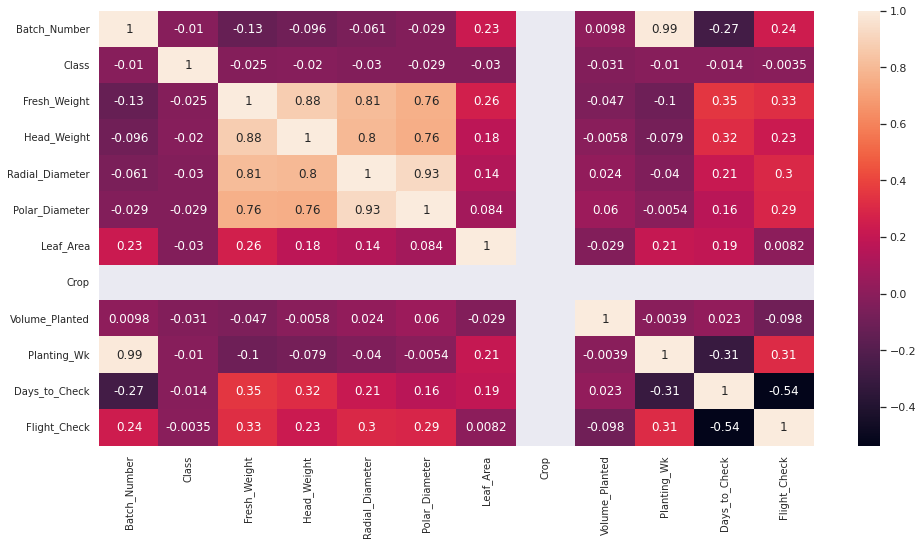

In [94]:
plt.tick_params(labelsize=10)
sns.set(rc = {'figure.figsize':(20,8)})
sns.heatmap(merge_df.corr(),annot=True);
plt.savefig('Heatmap.png')

In [95]:
merge_df.drop(['Crop'], axis=1, inplace=True)

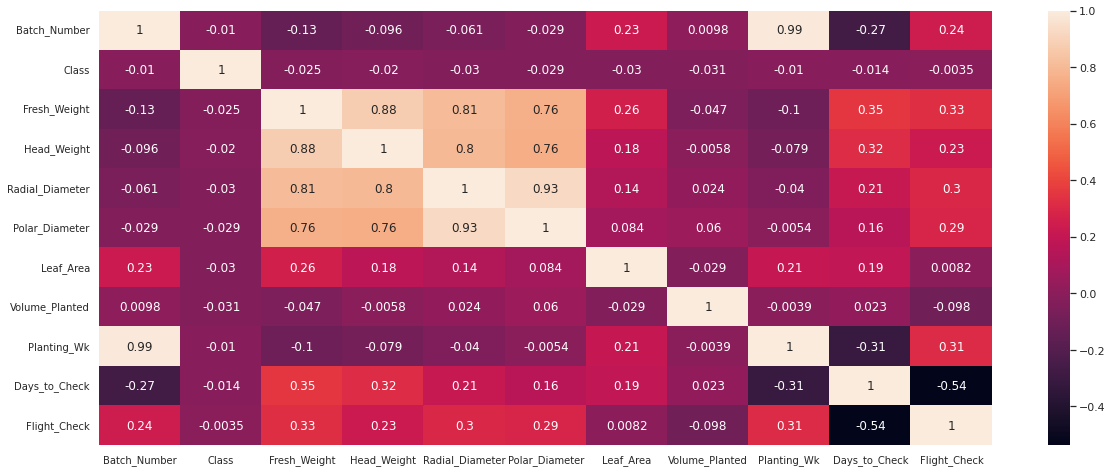

In [96]:
plt.tick_params(labelsize=10)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(merge_df.corr(),annot=True);

**Weather Data**

In [97]:
#Loading data
weather_df = pd.read_excel(r'Data.xlsx', parse_dates=True, sheet_name='weather')

#Renaming the columns 
col_nam = {'Unnamed: 0': 'Past_Date', 'Solar Radiation [avg]': 'Solar_Rad', 'Precipitation [sum]':'PPt', 'Wind Speed [avg]':'Wind_speed_avg', \
          'Wind Speed [max]': 'wind_speed_max', 'Battery Voltage [last]': 'Battery_Volt', 'Leaf Wetness [time]': 'leaf_wetness', \
          'Air Temperature [avg]': 'Air_Temp_avg', 'Air Temperature [max]': 'Air_Temp_max', 'Air Temperature [min]': 'Air_Temp_min',\
          'Relative Humidity [avg]':'Relative_Hum', 'Dew Point [avg]':'Dew_Point_Avg', 'Dew Point [min]': 'Dew_Point_min', 'ET0 [result]': 'ET0'}
weather_df.rename(columns = col_nam, inplace = True )
weather_df


Past_Date  Solar_Rad  PPt  Wind_speed_avg  wind_speed_max  Battery_Volt  \
0    2014-05-14        159  0.0             1.4             3.3          6834   
1    2014-05-15        280  0.0             0.6             2.3          6894   
2    2014-05-16        186  3.4             0.8             2.7          6874   
3    2014-05-17        221  0.0             1.0             3.3          6874   
4    2014-05-18        255  0.0             2.1             5.5          6854   
...         ...        ...  ...             ...             ...           ...   
2551 2021-05-17        196  1.4             2.2             5.5          7166   
2552 2021-05-17        173  2.8             1.8             5.5          6864   
2553 2021-05-18        311  0.0             1.4             5.0          6854   
2554 2021-05-19        232  6.6             1.8             5.5          6864   
2555 2021-05-20         44  0.0             0.5             2.7          7158   

      leaf_wetness  Air_Temp_avg  Air_Temp_max  Air_Temp_min  Relative_Hum  \
0               70         14.27         18.90          7.19         64.95   
1              500         13.51         22.06          3.04         72.91   
2              375         15.65         24.24          7.23         74.69   
3              565         17.46         25.70          9.93         71.42   
4              625         16.85         24.62          8.45         74.45   
...            ...           ...           ...           ...           ...   
2551             0         10.51         14.53          8.95         99.86   
2552             0         10.80         14.53          8.38         99.86   
2553             0         10.29         17.14          3.15         92.94   
2554             0         11.39         16.61          7.50         90.32   
2555             0          6.35          9.15          3.76         99.86   

      Dew_Point_Avg  Dew_Point_min  ET0  
0               7.0            5.6  NaN  
1               7.6            3.0  3.6  
2              10.5            6.5  2.9  
3              11.5            8.1  3.6  
4              11.4            8.3  4.2  
...             ...            ...  ...  
2551           10.3            8.8  NaN  
2552           10.6            8.2  NaN  
2553            8.8            3.0  3.4  
2554            9.4            5.2  3.0  
2555            6.2            3.6  NaN  

[2556 rows x 14 columns]

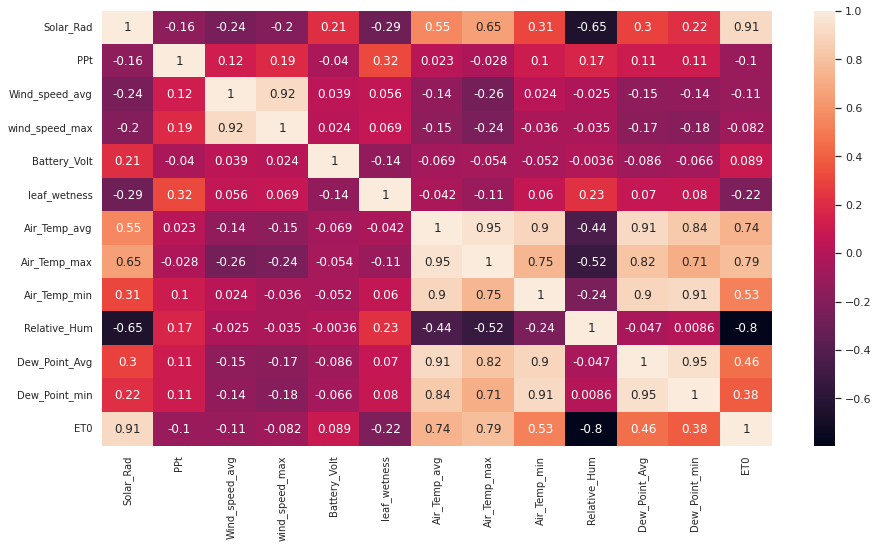

In [98]:
plt.tick_params(labelsize=10)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(weather_df.corr(),annot=True);

In [99]:
#Checking missing data in the weather data
weather_df.isnull().sum()

Past_Date          0
Solar_Rad          0
PPt                0
Wind_speed_avg     0
wind_speed_max     0
Battery_Volt       0
leaf_wetness       0
Air_Temp_avg       0
Air_Temp_max       0
Air_Temp_min       0
Relative_Hum       0
Dew_Point_Avg      3
Dew_Point_min     46
ET0               66
dtype: int64

In [101]:
#Handling the missing values in the weather data
weather_df['Dew_Point_Avg']  = weather_df['Dew_Point_Avg'].fillna(weather_df['Dew_Point_Avg'].mode())
weather_df['ET0'] = weather_df['ET0'].fillna(weather_df['ET0'].mode())

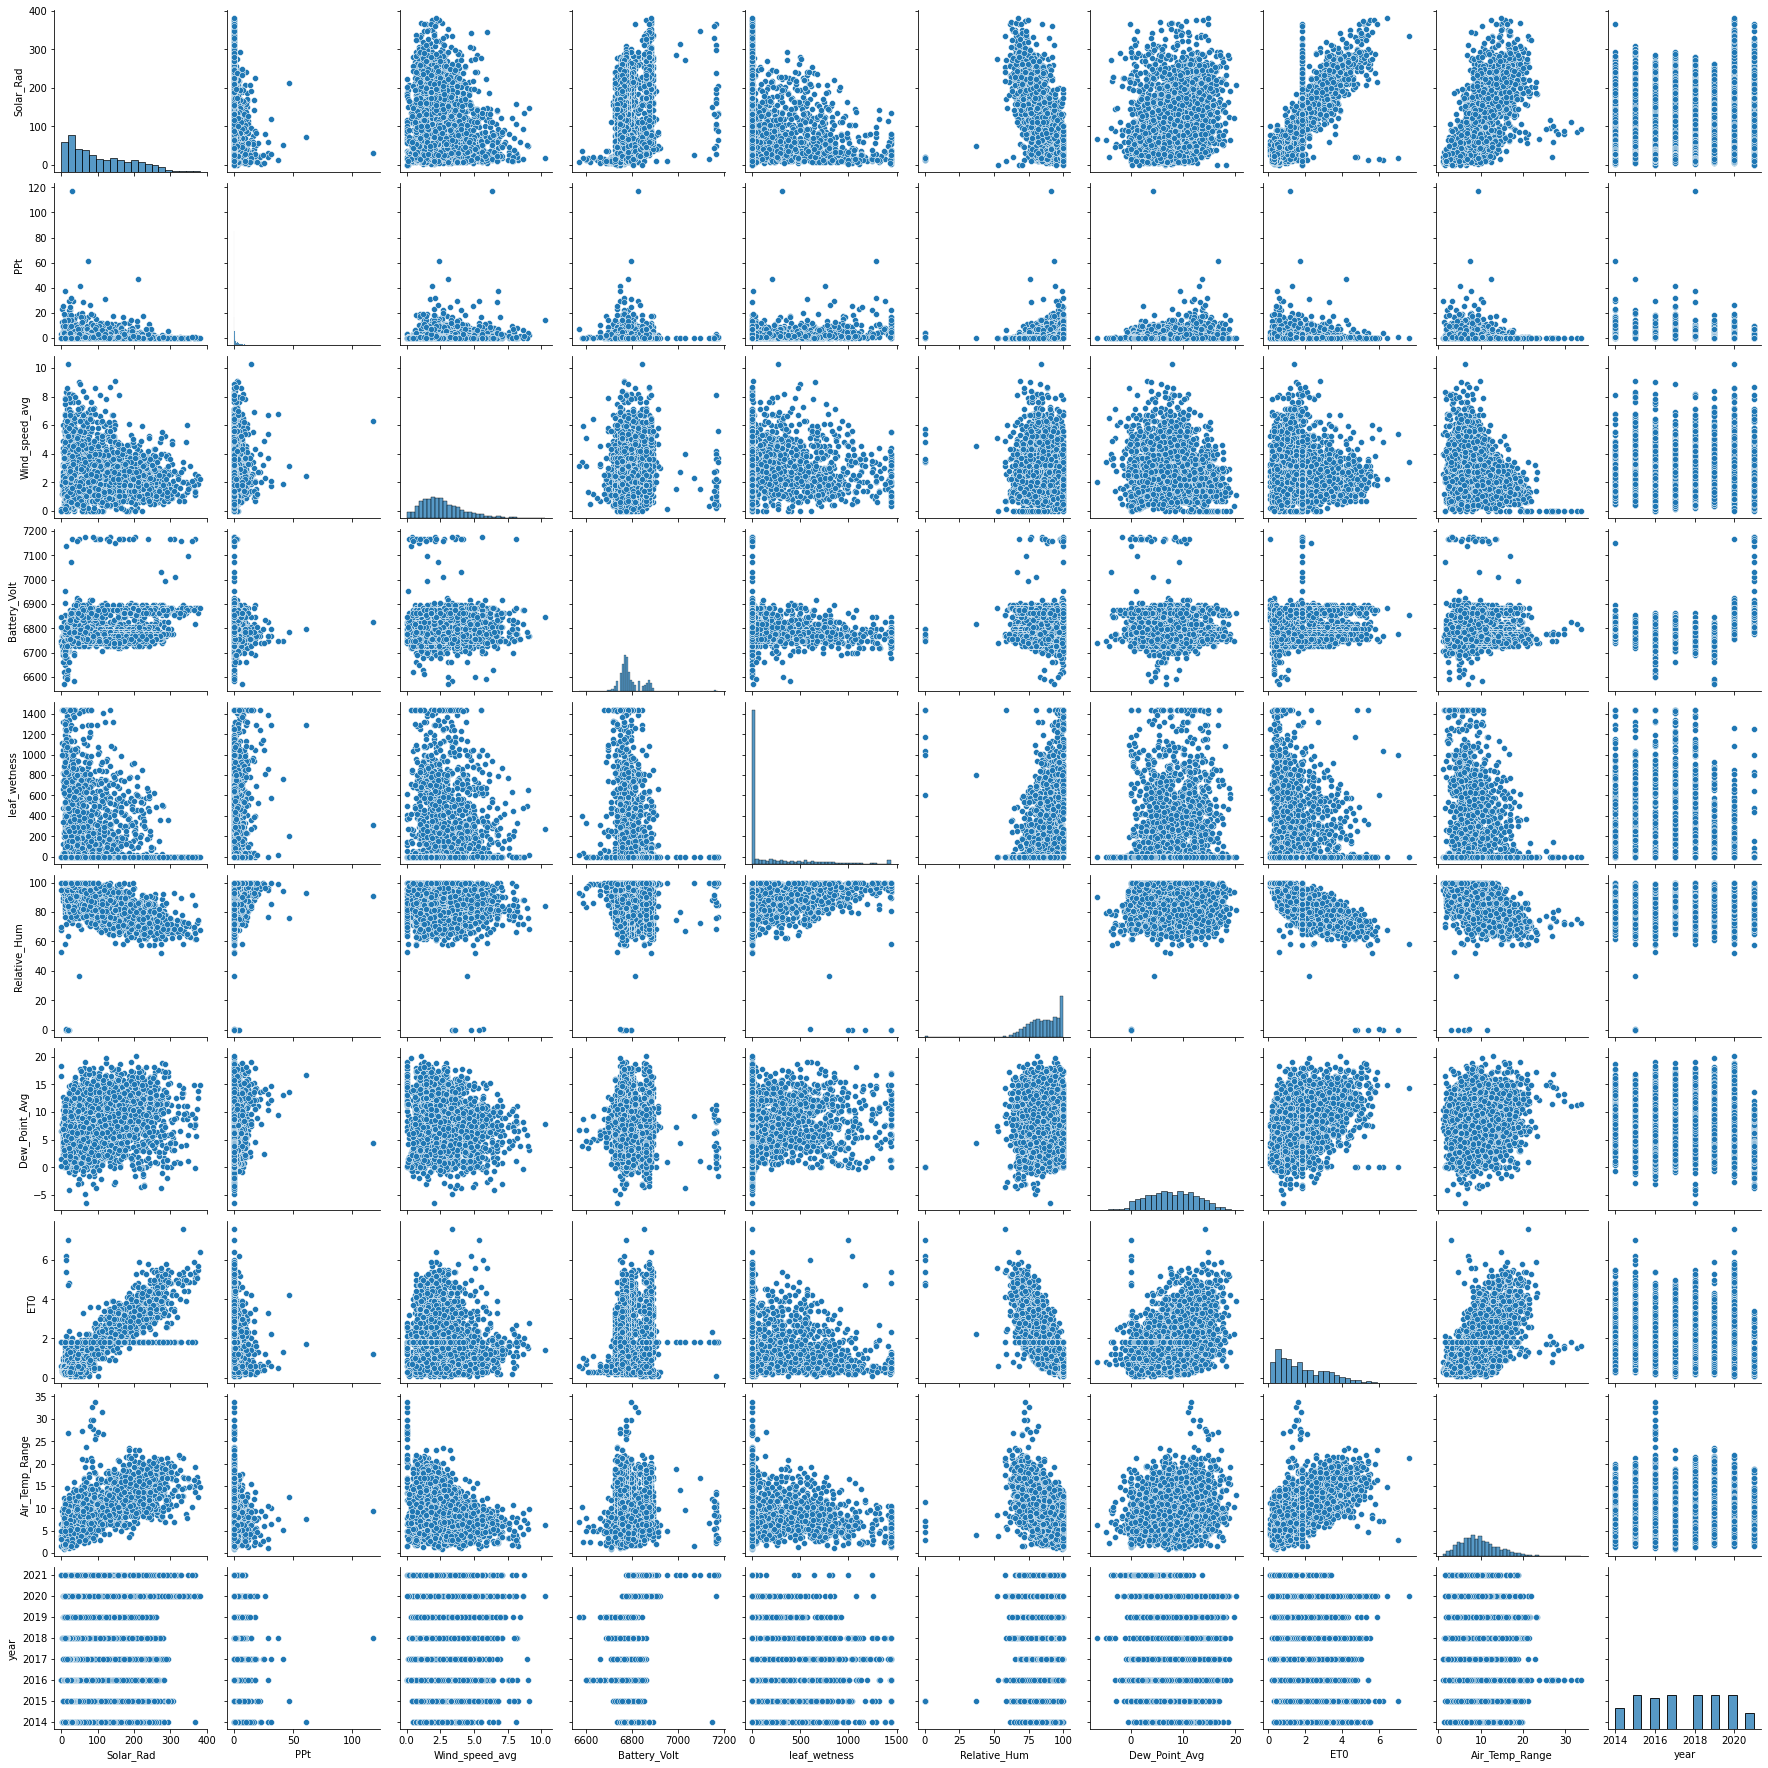

In [ ]:
#Pair plot of the weather data
sns.pairplot(weather_df)

In [102]:
#Grouping the data by year 
weather_df['year'] = pd.DatetimeIndex(weather_df['Past_Date']).year
weather_df['Month_Day'] = weather_df['Past_Date'].dt.strftime('%m-%d')
weather_df.head()

Past_Date  Solar_Rad  PPt  Wind_speed_avg  wind_speed_max  Battery_Volt  \
0 2014-05-14        159  0.0             1.4             3.3          6834   
1 2014-05-15        280  0.0             0.6             2.3          6894   
2 2014-05-16        186  3.4             0.8             2.7          6874   
3 2014-05-17        221  0.0             1.0             3.3          6874   
4 2014-05-18        255  0.0             2.1             5.5          6854   

   leaf_wetness  Air_Temp_avg  Air_Temp_max  Air_Temp_min  Relative_Hum  \
0            70         14.27         18.90          7.19         64.95   
1           500         13.51         22.06          3.04         72.91   
2           375         15.65         24.24          7.23         74.69   
3           565         17.46         25.70          9.93         71.42   
4           625         16.85         24.62          8.45         74.45   

   Dew_Point_Avg  Dew_Point_min  ET0  year Month_Day  
0            7.0            5.6  1.5  2014     05-14  
1            7.6            3.0  3.6  2014     05-15  
2           10.5            6.5  2.9  2014     05-16  
3           11.5            8.1  3.6  2014     05-17  
4           11.4            8.3  4.2  2014     05-18

In [103]:
#A function to extract yearly weather data 
def yearly_weather(df, colum_name, year):
  '''
  This function is to extract data for a particular  year from data 
  df = dataset
  colum_name  = the date column with the quotation mark ''
  year = the year you would like to extract the data for
  '''
  y = df[(df[colum_name] == year)]
  return (y)

#df = df.loc[:, df.notnull().any(axis = 0)]

**Extracting 2019 weather data only**

In [104]:
weather_2019 = yearly_weather(weather_df, 'year', 2019)
weather_2019

Past_Date  Solar_Rad  PPt  Wind_speed_avg  wind_speed_max  Battery_Volt  \
1656 2019-01-01         12  3.8             3.2             5.6          6806   
1657 2019-01-02         15  1.0             2.2             4.2          6816   
1658 2019-01-03         11  0.8             1.3             2.9          6776   
1659 2019-01-04         14  0.0             1.6             4.1          6748   
1660 2019-01-05          4  0.4             2.2             4.4          6688   
...         ...        ...  ...             ...             ...           ...   
2013 2019-12-27         10  0.2             1.1             4.0          6728   
2014 2019-12-28         15  0.0             2.4             5.5          6728   
2015 2019-12-29         31  0.0             2.7             4.4          6748   
2016 2019-12-30         51  0.0             1.5             4.4          6796   
2017 2019-12-31         39  0.0             1.3             4.7          6806   

      leaf_wetness  Air_Temp_avg  Air_Temp_max  Air_Temp_min  Relative_Hum  \
1656             0          7.64         10.89          3.90         89.89   
1657             0          4.10          5.64          1.72         95.90   
1658             0          3.33          4.75          1.54         94.15   
1659             0          0.65          3.80         -3.30         97.88   
1660             0          4.53          5.47          3.76         94.51   
...            ...           ...           ...           ...           ...   
2013             0          6.92          8.46          3.76         94.44   
2014             0          6.97          8.72          5.11         94.91   
2015             0          6.94          8.69          4.42         88.96   
2016             0          4.72         10.56          0.67         90.85   
2017             0          4.46          9.00          0.00         95.79   

      Dew_Point_Avg  Dew_Point_min  ET0  year Month_Day  
1656            5.9            2.2  0.7  2019     01-01  
1657            3.4            1.6  0.4  2019     01-02  
1658            2.3           -0.1  0.4  2019     01-03  
1659            1.0           -1.0  0.3  2019     01-04  
1660            3.6            1.9  0.5  2019     01-05  
...             ...            ...  ...   ...       ...  
2013            5.9            3.5  0.4  2019     12-27  
2014            6.1            5.0  0.4  2019     12-28  
2015            5.1            3.2  0.5  2019     12-29  
2016            3.1            0.3  0.4  2019     12-30  
2017            3.7           -0.2  0.3  2019     12-31  

[362 rows x 16 columns]

In [105]:
weather_2019.describe()

Solar_Rad         PPt  Wind_speed_avg  wind_speed_max  Battery_Volt  \
count  362.000000  362.000000      362.000000      362.000000    362.000000   
mean    94.104972    0.983978        2.593370        5.720718   6751.823204   
std     68.378692    2.068915        1.479185        2.152686     28.212327   
min      4.000000    0.000000        0.300000        1.400000   6572.000000   
25%     31.250000    0.000000        1.500000        4.100000   6738.000000   
50%     76.000000    0.200000        2.300000        5.300000   6756.000000   
75%    149.750000    1.000000        3.300000        6.900000   6766.000000   
max    261.000000   17.800000        8.400000       13.700000   6844.000000   

       leaf_wetness  Air_Temp_avg  Air_Temp_max  Air_Temp_min  Relative_Hum  \
count    362.000000    362.000000    362.000000    362.000000    362.000000   
mean      97.237569     10.686215     15.475359      5.660276     88.273453   
std      199.512478      5.380372      6.591976      4.975316      9.366478   
min        0.000000     -1.440000      2.130000     -6.240000     61.020000   
25%        0.000000      6.637500     10.315000      1.912500     79.925000   
50%        0.000000     10.410000     14.615000      5.415000     89.655000   
75%       78.750000     14.797500     20.452500      9.237500     97.122500   
max      925.000000     27.230000     38.250000     17.370000     99.910000   

       Dew_Point_Avg  Dew_Point_min         ET0    year  
count     362.000000     342.000000  362.000000   362.0  
mean        8.317680       5.251170    1.681215  2019.0  
std         4.485547       4.283972    1.191210     0.0  
min        -0.700000      -3.500000    0.200000  2019.0  
25%         4.500000       1.600000    0.600000  2019.0  
50%         8.050000       4.850000    1.400000  2019.0  
75%        11.975000       8.400000    2.600000  2019.0  
max        19.700000      15.400000    5.900000  2019.0

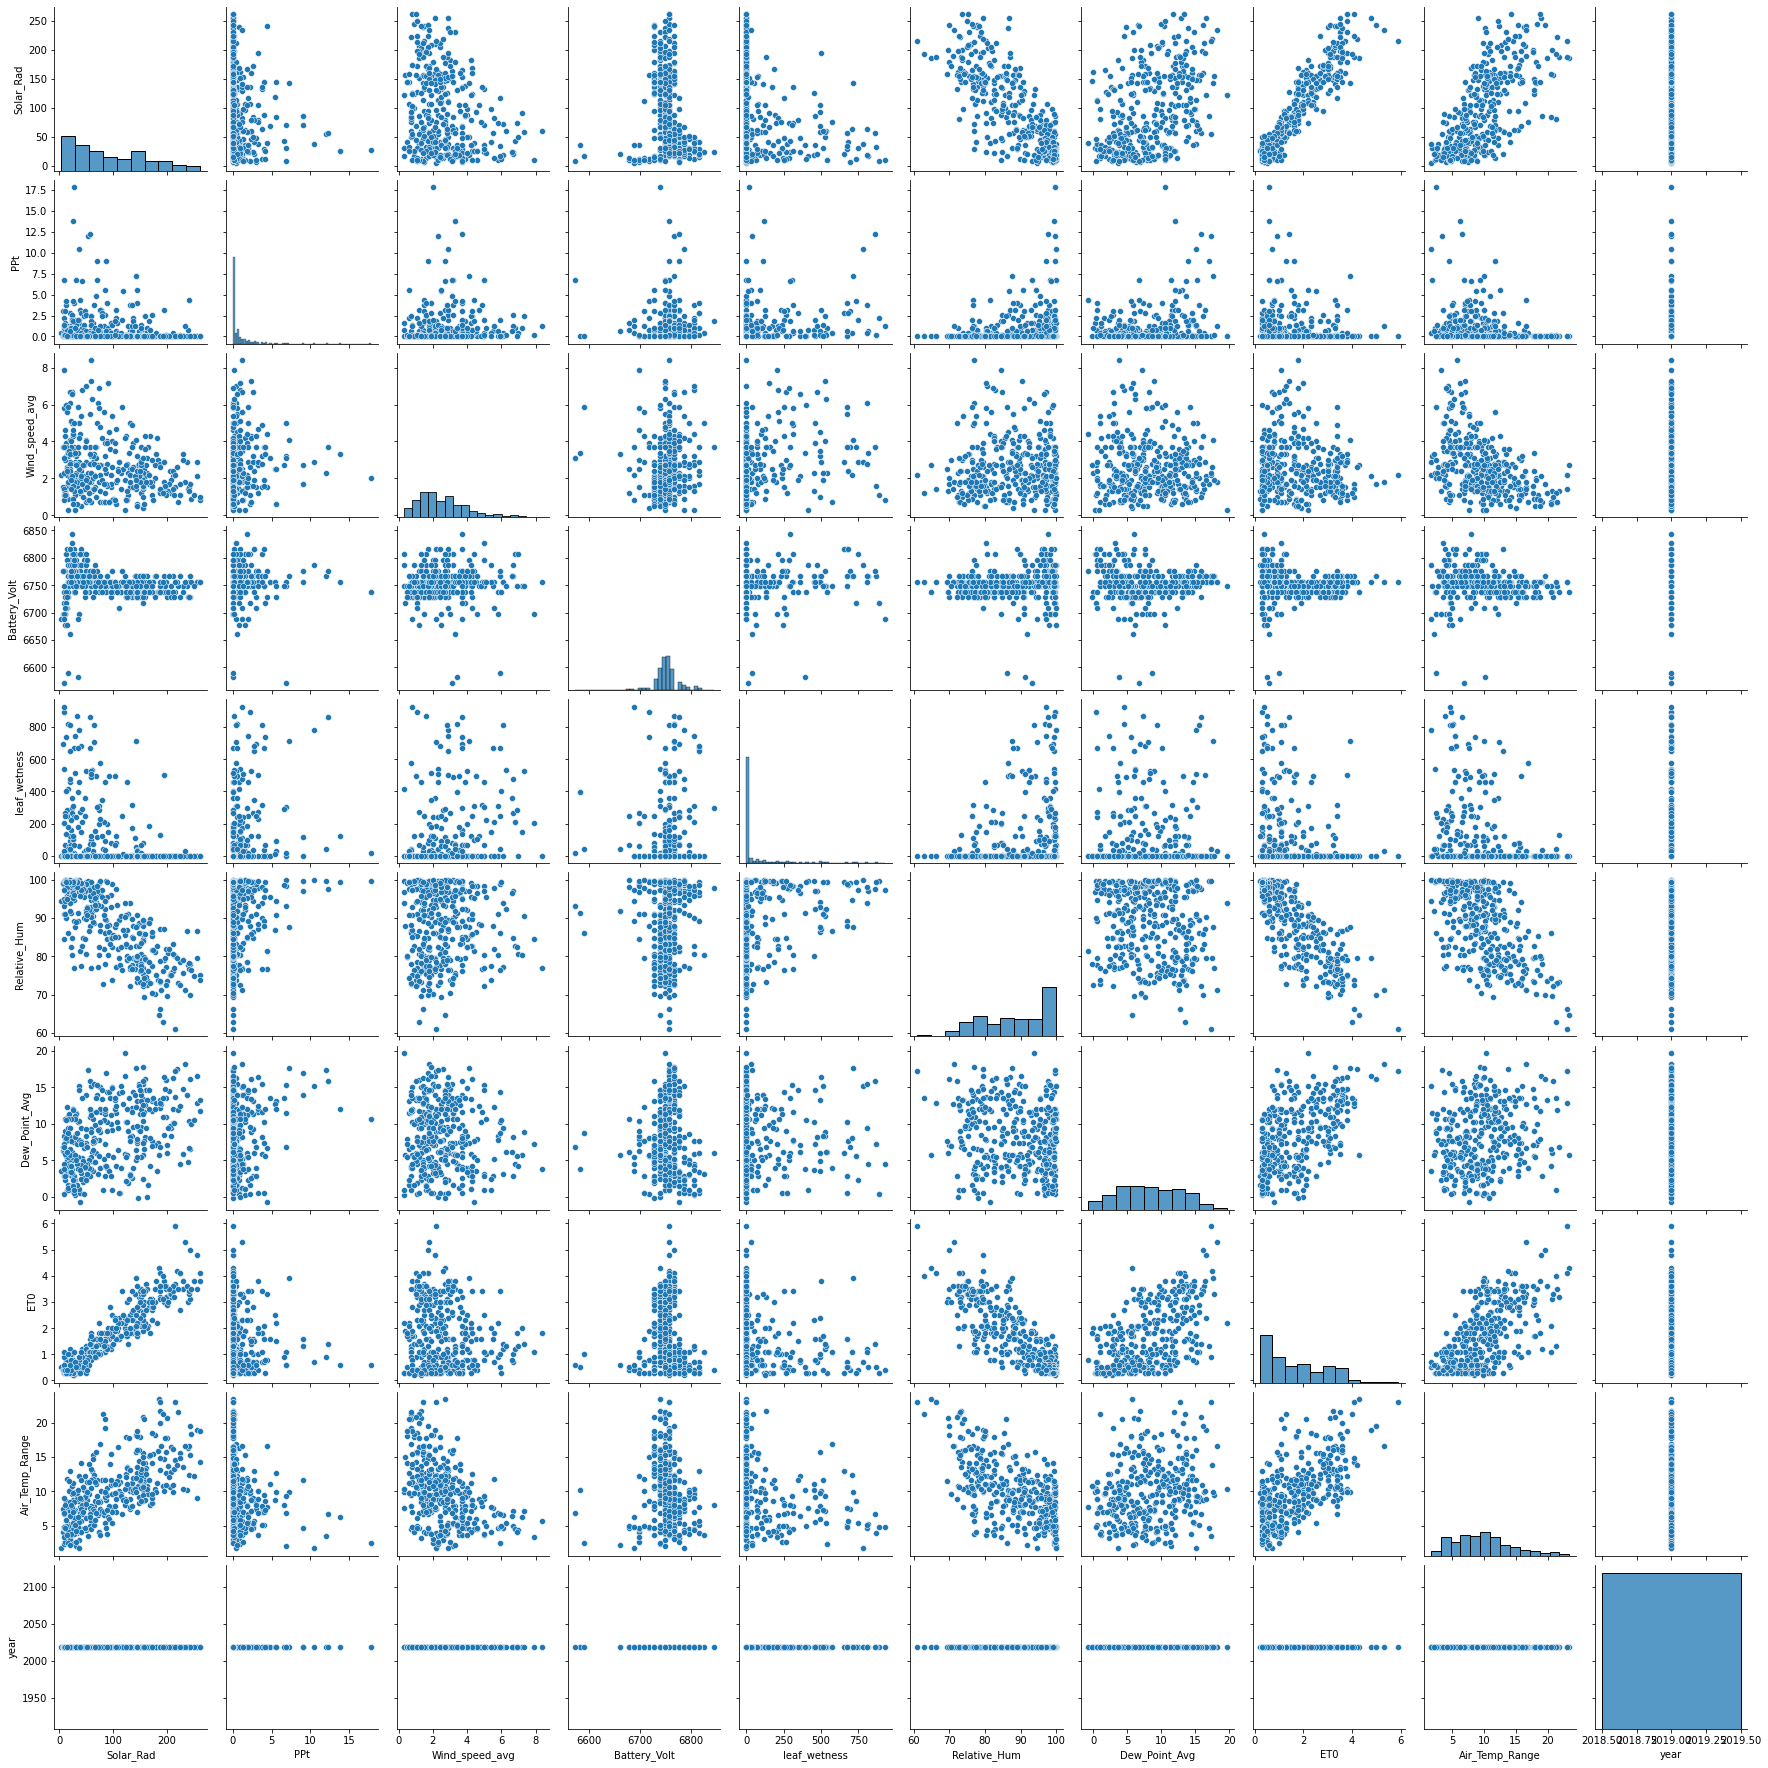

In [ ]:
sns.pairplot(weather_2019)

In [ ]:
merge_df.head()

Batch_Number  Class  Fresh_Weight  Head_Weight  Radial_Diameter  \
0           402      3          15.0        192.5       108.791036   
1           402      4          15.0        192.5       108.791036   
2           402      1          16.0        192.5       108.791036   
3           402      3          15.0        192.5       108.791036   
4           402      3          15.0        192.5       108.791036   

   Polar_Diameter  Leaf_Area Check_Date Flight_Date  Crop Plant_Date  \
0      101.164749      185.0 2020-04-30  2020-04-30     3 2020-04-11   
1      101.164749      156.0 2020-04-30  2020-04-30     3 2020-04-11   
2      101.164749      137.0 2020-04-30  2020-04-30     3 2020-04-11   
3      101.164749      225.0 2020-04-30  2020-04-30     3 2020-04-11   
4      101.164749      157.0 2020-04-30  2020-04-30     3 2020-04-11   

   Volume_Planted  Planting_Wk  Days_to_Check  Flight_Check Flight_Month_day  \
0        155232.0         15.0              0            19            04-30   
1        155232.0         15.0              0            19            04-30   
2        155232.0         15.0              0            19            04-30   
3        155232.0         15.0              0            19            04-30   
4        155232.0         15.0              0            19            04-30   

  Plant_Month_day  
0           04-11  
1           04-11  
2           04-11  
3           04-11  
4           04-11

**Final Data Merge with weather data**

In [182]:
complete_df = pd.merge(merge_df, weather_2019, left_on='Flight_Month_day', right_on='Month_Day',  how= 'inner')
complete_df

Batch_Number  Class  Fresh_Weight  Head_Weight  Radial_Diameter  \
0              402      3          15.0        192.5       108.791036   
1              402      4          15.0        192.5       108.791036   
2              402      1          16.0        192.5       108.791036   
3              402      3          15.0        192.5       108.791036   
4              402      3          15.0        192.5       108.791036   
...            ...    ...           ...          ...              ...   
3395           693      4         621.0        188.0       120.000000   
3396           693      1         680.0        273.0       120.000000   
3397           693      2         583.0        203.0       115.000000   
3398           693      3         609.0        213.0       120.000000   
3399           693      3         709.0        283.0       130.000000   

      Polar_Diameter  Leaf_Area Check_Date Flight_Date Plant_Date  ...  \
0         101.164749      185.0 2020-04-30  2020-04-30 2020-04-11  ...   
1         101.164749      156.0 2020-04-30  2020-04-30 2020-04-11  ...   
2         101.164749      137.0 2020-04-30  2020-04-30 2020-04-11  ...   
3         101.164749      225.0 2020-04-30  2020-04-30 2020-04-11  ...   
4         101.164749      157.0 2020-04-30  2020-04-30 2020-04-11  ...   
...              ...        ...        ...         ...        ...  ...   
3395       85.000000      780.0 2020-09-25  2020-09-10 2020-08-08  ...   
3396       90.000000      834.0 2020-09-25  2020-09-10 2020-08-08  ...   
3397       92.000000      726.0 2020-09-25  2020-09-10 2020-08-08  ...   
3398       90.000000      769.0 2020-09-25  2020-09-10 2020-08-08  ...   
3399       93.000000      802.0 2020-09-25  2020-09-10 2020-08-08  ...   

      leaf_wetness  Air_Temp_avg  Air_Temp_max  Air_Temp_min Relative_Hum  \
0                0          8.07         15.36          0.35        88.00   
1                0          8.07         15.36          0.35        88.00   
2                0          8.07         15.36          0.35        88.00   
3                0          8.07         15.36          0.35        88.00   
4                0          8.07         15.36          0.35        88.00   
...            ...           ...           ...           ...          ...   
3395             0         13.71         18.94          7.24        89.73   
3396             0         13.71         18.94          7.24        89.73   
3397             0         13.71         18.94          7.24        89.73   
3398             0         13.71         18.94          7.24        89.73   
3399             0         13.71         18.94          7.24        89.73   

     Dew_Point_Avg Dew_Point_min  ET0  year  Month_Day  
0              5.7           0.2  1.9  2019      04-30  
1              5.7           0.2  1.9  2019      04-30  
2              5.7           0.2  1.9  2019      04-30  
3              5.7           0.2  1.9  2019      04-30  
4              5.7           0.2  1.9  2019      04-30  
...            ...           ...  ...   ...        ...  
3395          11.7           7.1  1.5  2019      09-10  
3396          11.7           7.1  1.5  2019      09-10  
3397          11.7           7.1  1.5  2019      09-10  
3398          11.7           7.1  1.5  2019      09-10  
3399          11.7           7.1  1.5  2019      09-10  

[3400 rows x 32 columns]

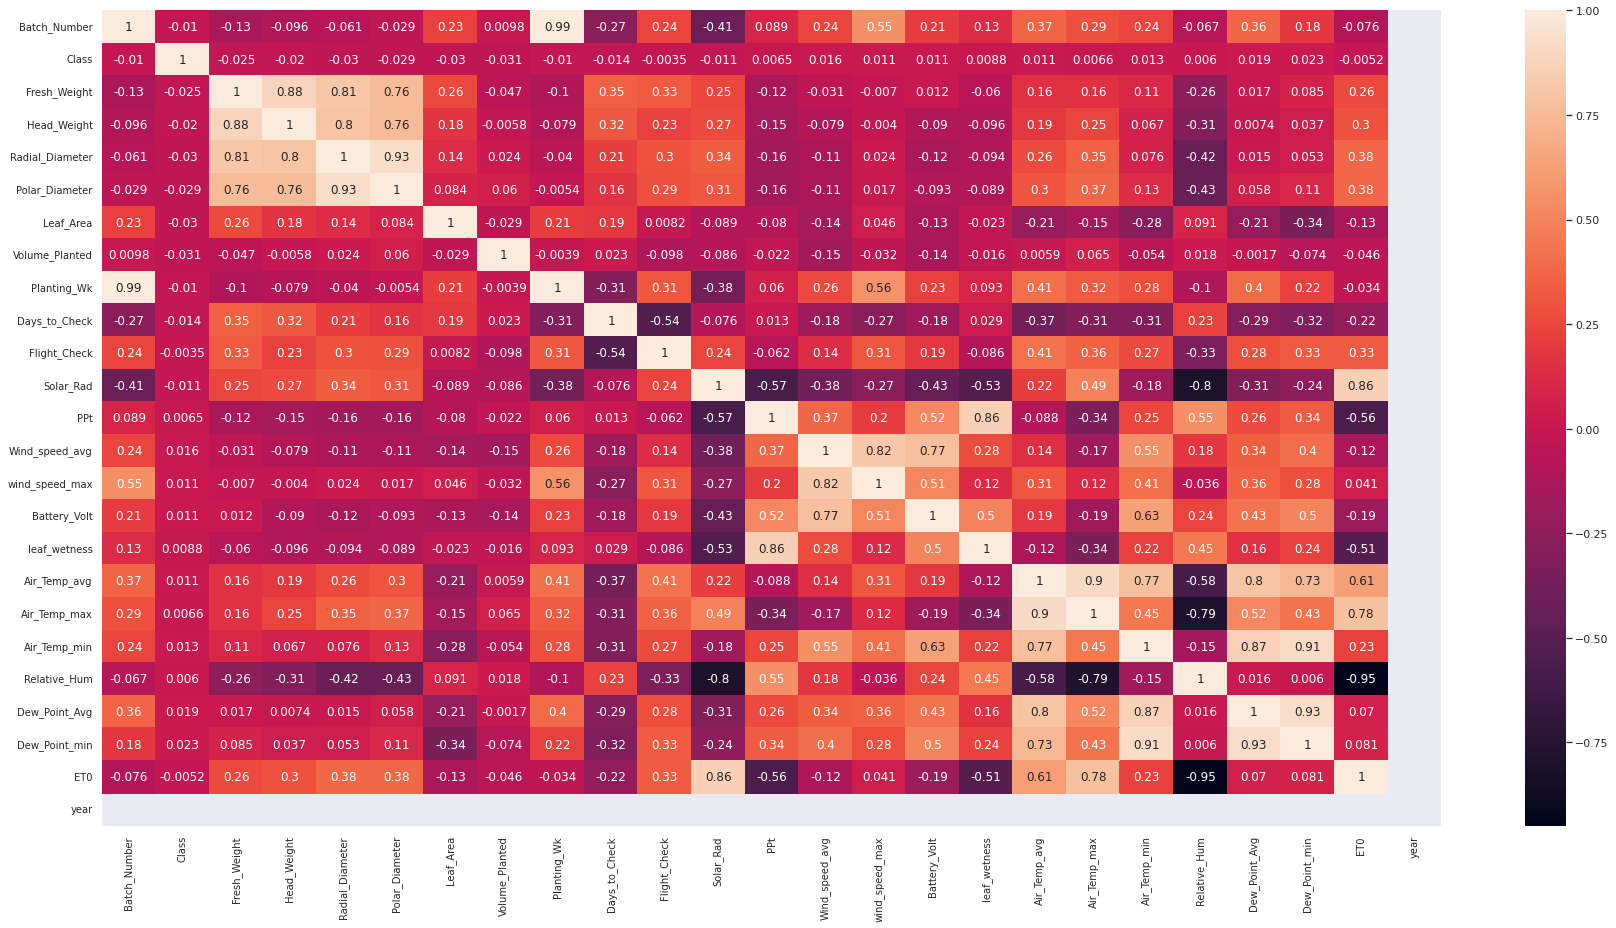

In [186]:
plt.tick_params(labelsize=10)
sns.set(rc = {'figure.figsize':(30,15)})
sns.heatmap(complete_df.corr(),annot=True);
plt.savefig('Complete heat map.png')

In [ ]:
#for i, row in complete_df.iterrows():
   # Weather_subset = complete_df[complete_df['Month_Day']>=complete_df['Plant_Month_day'] and complete_df['Month_Day']<=complete_df['Flight_Month_day']]
    #if Weather_subset == True:
   # ifor_val = complete_df.loc[Weather_subset]
    #complete_df.at[i,'ifor'] = ifor_val

In [ ]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 3399
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Batch_Number      3400 non-null   int64          
 1   Class             3400 non-null   int64          
 2   Fresh_Weight      3400 non-null   float64        
 3   Head_Weight       3400 non-null   float64        
 4   Radial_Diameter   3400 non-null   float64        
 5   Polar_Diameter    3400 non-null   float64        
 6   Leaf_Area         3400 non-null   float64        
 7   Check_Date        3400 non-null   datetime64[ns] 
 8   Flight_Date       3400 non-null   datetime64[ns] 
 9   Plant_Date        3400 non-null   datetime64[ns] 
 10  Volume_Planted    3400 non-null   float64        
 11  Planting_Wk       3400 non-null   float64        
 12  Days_to_Check     3400 non-null   timedelta64[ns]
 13  Flight_Check      3400 non-null   timedelta64[ns]
 14  Flight_M

In [109]:
#Dropping the Date columns and Batch number 
complete_df.drop(columns= ['Check_Date', 'Plant_Date', 'Flight_Date', 'Past_Date', 'year', 'Month_Day', 'Batch_Number','Flight_Month_day', 'Plant_Month_day'], inplace= True)


In [110]:
complete_df

Class  Fresh_Weight  Head_Weight  Radial_Diameter  Polar_Diameter  \
0         3          15.0        192.5       108.791036      101.164749   
1         4          15.0        192.5       108.791036      101.164749   
2         1          16.0        192.5       108.791036      101.164749   
3         3          15.0        192.5       108.791036      101.164749   
4         3          15.0        192.5       108.791036      101.164749   
...     ...           ...          ...              ...             ...   
3395      4         621.0        188.0       120.000000       85.000000   
3396      1         680.0        273.0       120.000000       90.000000   
3397      2         583.0        203.0       115.000000       92.000000   
3398      3         609.0        213.0       120.000000       90.000000   
3399      3         709.0        283.0       130.000000       93.000000   

      Leaf_Area  Volume_Planted  Planting_Wk  Days_to_Check  Flight_Check  \
0         185.0        155232.0         15.0              0            19   
1         156.0        155232.0         15.0              0            19   
2         137.0        155232.0         15.0              0            19   
3         225.0        155232.0         15.0              0            19   
4         157.0        155232.0         15.0              0            19   
...         ...             ...          ...            ...           ...   
3395      780.0        133056.0         32.0             15            33   
3396      834.0        133056.0         32.0             15            33   
3397      726.0        133056.0         32.0             15            33   
3398      769.0        133056.0         32.0             15            33   
3399      802.0        133056.0         32.0             15            33   

      ...  wind_speed_max  Battery_Volt  leaf_wetness  Air_Temp_avg  \
0     ...             2.2          6718             0          8.07   
1     ...             2.2          6718             0          8.07   
2     ...             2.2          6718             0          8.07   
3     ...             2.2          6718             0          8.07   
4     ...             2.2          6718             0          8.07   
...   ...             ...           ...           ...           ...   
3395  ...             3.2          6748             0         13.71   
3396  ...             3.2          6748             0         13.71   
3397  ...             3.2          6748             0         13.71   
3398  ...             3.2          6748             0         13.71   
3399  ...             3.2          6748             0         13.71   

      Air_Temp_max  Air_Temp_min  Relative_Hum  Dew_Point_Avg  Dew_Point_min  \
0            15.36          0.35         88.00            5.7            0.2   
1            15.36          0.35         88.00            5.7            0.2   
2            15.36          0.35         88.00            5.7            0.2   
3            15.36          0.35         88.00            5.7            0.2   
4            15.36          0.35         88.00            5.7            0.2   
...            ...           ...           ...            ...            ...   
3395         18.94          7.24         89.73           11.7            7.1   
3396         18.94          7.24         89.73           11.7            7.1   
3397         18.94          7.24         89.73           11.7            7.1   
3398         18.94          7.24         89.73           11.7            7.1   
3399         18.94          7.24         89.73           11.7            7.1   

      ET0  
0     1.9  
1     1.9  
2     1.9  
3     1.9  
4     1.9  
...   ...  
3395  1.5  
3396  1.5  
3397  1.5  
3398  1.5  
3399  1.5  

[3400 rows x 23 columns]

In [ ]:
#complete_df.groupby(complete_df['Flight_Date'].dt.year)(complete_df['Check_Date'] - complete_df['Plant_Date']).agg(['sum', 'mean', 'max'])

**Model**



Multi-label linear regressor to simultaneously predict 
** head weight, polar diameter, and radial diameter** at the ‘Check Date’ using information about the plant at flight time and about the weather.


Splitting Data to Training and Test Set

In [111]:
complete_df

Class  Fresh_Weight  Head_Weight  Radial_Diameter  Polar_Diameter  \
0         3          15.0        192.5       108.791036      101.164749   
1         4          15.0        192.5       108.791036      101.164749   
2         1          16.0        192.5       108.791036      101.164749   
3         3          15.0        192.5       108.791036      101.164749   
4         3          15.0        192.5       108.791036      101.164749   
...     ...           ...          ...              ...             ...   
3395      4         621.0        188.0       120.000000       85.000000   
3396      1         680.0        273.0       120.000000       90.000000   
3397      2         583.0        203.0       115.000000       92.000000   
3398      3         609.0        213.0       120.000000       90.000000   
3399      3         709.0        283.0       130.000000       93.000000   

      Leaf_Area  Volume_Planted  Planting_Wk  Days_to_Check  Flight_Check  \
0         185.0        155232.0         15.0              0            19   
1         156.0        155232.0         15.0              0            19   
2         137.0        155232.0         15.0              0            19   
3         225.0        155232.0         15.0              0            19   
4         157.0        155232.0         15.0              0            19   
...         ...             ...          ...            ...           ...   
3395      780.0        133056.0         32.0             15            33   
3396      834.0        133056.0         32.0             15            33   
3397      726.0        133056.0         32.0             15            33   
3398      769.0        133056.0         32.0             15            33   
3399      802.0        133056.0         32.0             15            33   

      ...  wind_speed_max  Battery_Volt  leaf_wetness  Air_Temp_avg  \
0     ...             2.2          6718             0          8.07   
1     ...             2.2          6718             0          8.07   
2     ...             2.2          6718             0          8.07   
3     ...             2.2          6718             0          8.07   
4     ...             2.2          6718             0          8.07   
...   ...             ...           ...           ...           ...   
3395  ...             3.2          6748             0         13.71   
3396  ...             3.2          6748             0         13.71   
3397  ...             3.2          6748             0         13.71   
3398  ...             3.2          6748             0         13.71   
3399  ...             3.2          6748             0         13.71   

      Air_Temp_max  Air_Temp_min  Relative_Hum  Dew_Point_Avg  Dew_Point_min  \
0            15.36          0.35         88.00            5.7            0.2   
1            15.36          0.35         88.00            5.7            0.2   
2            15.36          0.35         88.00            5.7            0.2   
3            15.36          0.35         88.00            5.7            0.2   
4            15.36          0.35         88.00            5.7            0.2   
...            ...           ...           ...            ...            ...   
3395         18.94          7.24         89.73           11.7            7.1   
3396         18.94          7.24         89.73           11.7            7.1   
3397         18.94          7.24         89.73           11.7            7.1   
3398         18.94          7.24         89.73           11.7            7.1   
3399         18.94          7.24         89.73           11.7            7.1   

      ET0  
0     1.9  
1     1.9  
2     1.9  
3     1.9  
4     1.9  
...   ...  
3395  1.5  
3396  1.5  
3397  1.5  
3398  1.5  
3399  1.5  

[3400 rows x 23 columns]

In [118]:
features =  complete_df.loc[:, ~complete_df.columns.isin(['Head_Weight','Polar_Diameter','Radial_Diameter', ...])]
features

Class  Fresh_Weight  Leaf_Area  Volume_Planted  Planting_Wk  \
0         3          15.0      185.0        155232.0         15.0   
1         4          15.0      156.0        155232.0         15.0   
2         1          16.0      137.0        155232.0         15.0   
3         3          15.0      225.0        155232.0         15.0   
4         3          15.0      157.0        155232.0         15.0   
...     ...           ...        ...             ...          ...   
3395      4         621.0      780.0        133056.0         32.0   
3396      1         680.0      834.0        133056.0         32.0   
3397      2         583.0      726.0        133056.0         32.0   
3398      3         609.0      769.0        133056.0         32.0   
3399      3         709.0      802.0        133056.0         32.0   

      Days_to_Check  Flight_Check  Solar_Rad  PPt  Wind_speed_avg  \
0                 0            19        156  0.0             0.4   
1                 0            19        156  0.0             0.4   
2                 0            19        156  0.0             0.4   
3                 0            19        156  0.0             0.4   
4                 0            19        156  0.0             0.4   
...             ...           ...        ...  ...             ...   
3395             15            33         85  0.0             1.2   
3396             15            33         85  0.0             1.2   
3397             15            33         85  0.0             1.2   
3398             15            33         85  0.0             1.2   
3399             15            33         85  0.0             1.2   

      wind_speed_max  Battery_Volt  leaf_wetness  Air_Temp_avg  Air_Temp_max  \
0                2.2          6718             0          8.07         15.36   
1                2.2          6718             0          8.07         15.36   
2                2.2          6718             0          8.07         15.36   
3                2.2          6718             0          8.07         15.36   
4                2.2          6718             0          8.07         15.36   
...              ...           ...           ...           ...           ...   
3395             3.2          6748             0         13.71         18.94   
3396             3.2          6748             0         13.71         18.94   
3397             3.2          6748             0         13.71         18.94   
3398             3.2          6748             0         13.71         18.94   
3399             3.2          6748             0         13.71         18.94   

      Air_Temp_min  Relative_Hum  Dew_Point_Avg  Dew_Point_min  ET0  
0             0.35         88.00            5.7            0.2  1.9  
1             0.35         88.00            5.7            0.2  1.9  
2             0.35         88.00            5.7            0.2  1.9  
3             0.35         88.00            5.7            0.2  1.9  
4             0.35         88.00            5.7            0.2  1.9  
...            ...           ...            ...            ...  ...  
3395          7.24         89.73           11.7            7.1  1.5  
3396          7.24         89.73           11.7            7.1  1.5  
3397          7.24         89.73           11.7            7.1  1.5  
3398          7.24         89.73           11.7            7.1  1.5  
3399          7.24         89.73           11.7            7.1  1.5  

[3400 rows x 20 columns]

In [147]:
# Create separate training and test sets. we'll use the training set for steps 3--6
train_set, test_set = train_test_split(complete_df, test_size=0.2, random_state=23)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(train_set), len(test_set))

2720 680


In [117]:
#Extracting gthe target variables
target = complete_df.filter(['Head_Weight','Polar_Diameter','Radial_Diameter'], axis=1)
target.head()

Head_Weight  Polar_Diameter  Radial_Diameter
0        192.5      101.164749       108.791036
1        192.5      101.164749       108.791036
2        192.5      101.164749       108.791036
3        192.5      101.164749       108.791036
4        192.5      101.164749       108.791036

In [128]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer

In [153]:
# example of using the ColumnTransformer for the Abalone dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
 


# determine categorical and numerical features
numerical_ix = ['Class']
categorical_ix = ['Fresh_Weight','Leaf_Area','Volume_Planted','Planting_Wk','Days_to_Check','Flight_Check','Solar_Rad','PPt','Wind_speed_avg','wind_speed_max',	'Battery_Volt',	'leaf_wetness',	'Air_Temp_avg',	'Air_Temp_max',	'Air_Temp_min',	'Relative_Hum',	'Dew_Point_Avg',	'Dew_Point_min',	'ET0']

# define the data preparation for the columns
t = [('cat', OneHotEncoder(), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)
# define the model
model = SVR(kernel='rbf',gamma='scale',C=100)
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])
# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(pipeline, features, target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert MAE scores to positive values
scores = absolute(scores)
# summarize the model performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 196, in fit
    accept_large_sparse=False,
  File "/usr/local/lib/python3.7/dist-packages/sklear

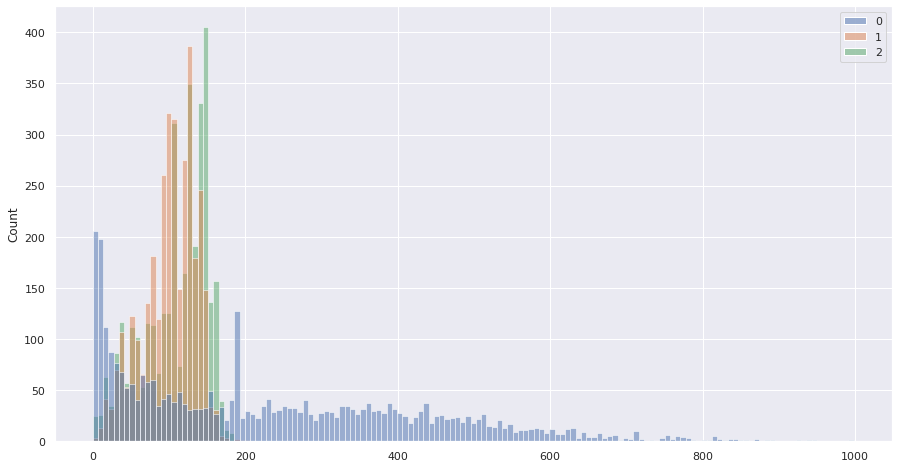

In [134]:
y = y_df.values
sns.histplot(y, kde=False)

In [ ]:
y.shape

(2720, 3)

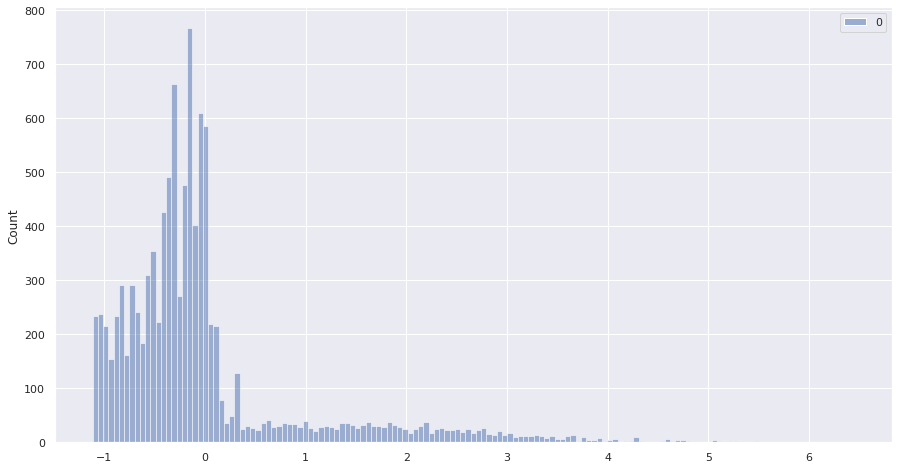

In [135]:
# Since the 'y' is skewed and the range is very large, we can also transform it
y_transformer = StandardScaler()  # we'll need this scaler for the test set later!
y = y_transformer.fit_transform(y.reshape(-1,1))
_ = sns.histplot(y, kde=False)

**Multioutput Regresor**

In [140]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [179]:
reg = LinearRegression()
ChainRegression= RegressorChain(reg, order=[1,2,0])
ChainRegression.fit(features,target)
print(ChainRegression.score(X_test, y_test))

0.7501072288011529


In [181]:
regr = MultiOutputRegressor(Ridge(random_state=23)).fit(features, target)
regr.predict(X_test)

array([[131.25773246,  95.64359044,  98.12721057],
       [338.18200376, 126.58384643, 139.60717026],
       [-30.45164061,  67.37733401,  57.27363796],
       ...,
       [353.165902  , 131.67268234, 146.34758051],
       [ 33.34172443,  66.80199976,  56.98443941],
       [212.85691966,  99.56506198, 110.7118778 ]])

In [158]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [161]:
reg = MultiOutputRegressor(Ridge(random_state=123)).fit(features, target)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 2725.1325


**k-Nearest Neighbors for Multioutput Regression**

In [187]:
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import f1_score

In [188]:
# k-nearest neighbors for multioutput regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

# define model
model = KNeighborsRegressor()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("f1_score: %.2f +/- %.2f" % (scores.mean(), scores.std()))
# fit model
model.fit(features, target)
# make a prediction
yhat = model.predict(features)
# summarize prediction
print(yhat[0])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1270, in fbeta_score
    zero_division=zero_d

f1_score: nan +/- nan
[192.5        101.16474864 108.79103574]


**Decision tree for multioutput regression**

In [189]:
# decision tree for multioutput regression
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

# define model
model = DecisionTreeRegressor()
# fit model
model.fit(X_train, y_train)
# make a prediction
yhat = model.predict(X_test)
# summarize prediction
print(yhat)

[[150. 130. 120.]
 [305. 120. 155.]
 [  1.  30.  10.]
 ...
 [372. 140. 140.]
 [155.  20.   5.]
 [231. 110. 130.]]


**Evaluate Multioutput Regression With Cross-Validation**

In [190]:

# evaluate multioutput regression model with k-fold cross-validation
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, features, target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 21.538 (1.034)


**Direct Multioutput Regression**

In [191]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, features, target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 53.090 (17.075)


**Chained Multioutput Regression**

In [192]:

# example of evaluating chained multioutput regression with an SVM model
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR

# define base model
model = LinearSVR()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, features, target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 52.148 (18.501)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [ ]:
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])

# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, features, target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/compose/_target.py", line 246, in fit
    self.regressor_.fit(X, y_trans, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pytho

In [ ]:

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, features, target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 55.968 (18.338)


**Evaluate Multioutput Regression With Cross-Validation**

In [ ]:
# define model
model = DecisionTreeRegressor()

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model and collect the scores
n_scores = cross_val_score(model, features, target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 21.614 (1.204)
